In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import tqdm
import os

[[[233 240 244]
  [234 241 245]
  [  3   2   5]
  ...
  [  5 253 254]
  [  0   0   0]
  [  0   0   0]]

 [[251   2   6]
  [241 248 252]
  [  1   0   3]
  ...
  [  7 255   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 19  19  19]
  [223 223 229]
  [  3   4   9]
  ...
  [  1   1   1]
  [  2 255   0]
  [  2 255   0]]

 ...

 [[  1 254   6]
  [205 202 210]
  [  4 252   2]
  ...
  [ 20  18  14]
  [ 15  22  29]
  [190 197 204]]

 [[ 16  19  16]
  [ 11  14  11]
  [254 253   0]
  ...
  [237 239 243]
  [236 235 233]
  [ 40  39  37]]

 [[  7  10   7]
  [250 253 250]
  [249 248 251]
  ...
  [235 237 241]
  [237 236 234]
  [ 41  40  38]]]


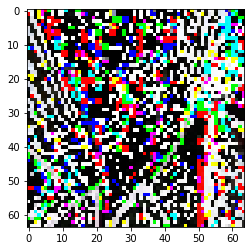

[[[246   9  14]
  [239   2   7]
  [247  10   7]
  ...
  [249 249 251]
  [  6   1  20]
  [250 245   8]]

 [[214 233 238]
  [238   1   6]
  [252  15  12]
  ...
  [248 248 250]
  [252 247  10]
  [156 151 170]]

 [[218 247 250]
  [247  20  17]
  [248  14  10]
  ...
  [253 241 243]
  [246 245 250]
  [  4   3   8]]

 ...

 [[ 30 255   5]
  [ 32   1   7]
  [236 219 229]
  ...
  [246 249 250]
  [250 248 247]
  [255 253 252]]

 [[239 205 223]
  [245 211 229]
  [240 223 235]
  ...
  [ 10  11   8]
  [  8  14  17]
  [247 253   0]]

 [[247 213 231]
  [254 220 238]
  [233 216 228]
  ...
  [251 252 249]
  [209 215 218]
  [226 232 235]]]


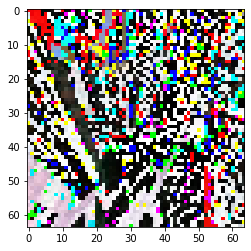

[[[  0   1 254]
  [ 11  12   9]
  [254   1   0]
  ...
  [ 13  13  13]
  [252   4   8]
  [253   5   9]]

 [[  6   7   4]
  [  0   1 254]
  [252 255 254]
  ...
  [  0   0   0]
  [249   1   5]
  [250   2   6]]

 [[  4   4   4]
  [  0   0   0]
  [  1 254 255]
  ...
  [  5 253 254]
  [152 160 179]
  [249   1  20]]

 ...

 [[241 244 245]
  [251 254 255]
  [250   1 254]
  ...
  [236 239 245]
  [214 220 224]
  [252   2   6]]

 [[247 248 250]
  [  1   2   4]
  [248   0 251]
  ...
  [240 240 240]
  [238 235 236]
  [  0 253 254]]

 [[252 253 255]
  [255   0   2]
  [ 21  29  24]
  ...
  [254 254 254]
  [ 37  34  35]
  [  1 254 255]]]


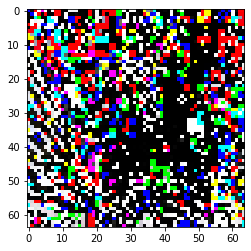

[[[  3   2   5]
  [251 250 253]
  [ 12 245 244]
  ...
  [254 247 245]
  [244   2  29]
  [147 161 188]]

 [[253 252 255]
  [255 254   1]
  [ 22 255 254]
  ...
  [ 13   6   4]
  [147 161 188]
  [203 217 244]]

 [[245 243 246]
  [  1 255   2]
  [  6 250 250]
  ...
  [139 164 201]
  [199 202 205]
  [ 78  81  84]]

 ...

 [[234 239 245]
  [221 226 232]
  [255 241 244]
  ...
  [247 245 241]
  [252 248 245]
  [ 48  44  41]]

 [[219 224 227]
  [221 226 228]
  [  0 236 245]
  ...
  [242 249   0]
  [224 235 242]
  [219 230 237]]

 [[230 235 236]
  [231 236 237]
  [227 207 216]
  ...
  [239 246 253]
  [224 235 242]
  [206 217 224]]]


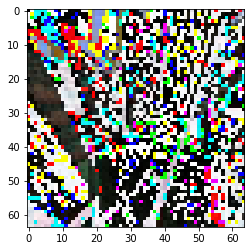

[[[ 11 248 243]
  [ 26   7   2]
  [  8   5   6]
  ...
  [247 242 246]
  [ 44   3 204]
  [145 104  49]]

 [[ 15 252 247]
  [ 14 251 246]
  [  3   0   1]
  ...
  [246 241 245]
  [147 106  51]
  [176 135  80]]

 [[ 17 250 249]
  [ 10 243 242]
  [ 20   8   5]
  ...
  [124  97  61]
  [180 150 121]
  [189 159 130]]

 ...

 [[  7   4 251]
  [ 20  17   8]
  [ 20  16  13]
  ...
  [  3   6   7]
  [  5   9  12]
  [213 217 220]]

 [[ 18  17  10]
  [ 19  18  12]
  [  7   3   0]
  ...
  [252 252 252]
  [ 22  20  16]
  [240 238 234]]

 [[250 249 250]
  [ 11  10   5]
  [ 13   9   6]
  ...
  [  1   1   1]
  [  6   4   0]
  [ 39  37  33]]]


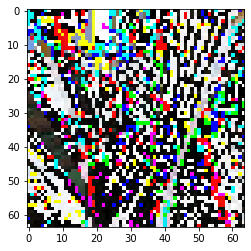

[[[  7   7   7]
  [243 243 243]
  [  4   5   2]
  ...
  [251 251 254]
  [  2   4   5]
  [  2   4   5]]

 [[252 252 252]
  [  4   4   4]
  [  2   3   0]
  ...
  [ 26  26  26]
  [  1   3   4]
  [236 238 250]]

 [[  9   7   5]
  [254 252 251]
  [241 243 242]
  ...
  [ 11  11  11]
  [  9  10  15]
  [240 241 251]]

 ...

 [[  5   7  11]
  [  5   7  11]
  [234 243 254]
  ...
  [248  29  19]
  [232 236 240]
  [252   0   4]]

 [[249 249 249]
  [  7   7   7]
  [246 251   3]
  ...
  [239  17   3]
  [214 227 232]
  [234 247 252]]

 [[  8   8   2]
  [249 249 249]
  [237 242 250]
  ...
  [241  19   5]
  [236 249 254]
  [232 245 250]]]


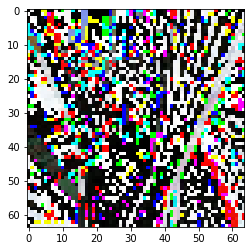

[[[252 250 248]
  [ 17  15  13]
  [  1   1   1]
  ...
  [ 36  29  17]
  [218 225 237]
  [218 225 237]]

 [[ 12  10   8]
  [  6   4   2]
  [252 252 252]
  ...
  [  5 254 245]
  [219 226 238]
  [249   0   1]]

 [[  4   2   1]
  [ 18  16  14]
  [  8   6   5]
  ...
  [226 226 231]
  [226 226 231]
  [ 19  19  16]]

 ...

 [[254 254 254]
  [255 255 255]
  [249 249 249]
  ...
  [238 238 240]
  [244  17   9]
  [240  13   5]]

 [[  3   2   5]
  [242 241 244]
  [  2   3   0]
  ...
  [251 251 253]
  [  0  28  17]
  [ 10  38  27]]

 [[  4   3   6]
  [  3   2   5]
  [  8   9   6]
  ...
  [252 252 254]
  [238  10 255]
  [233   5 250]]]


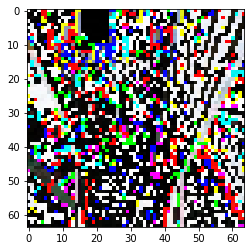

[[[247  11  12]
  [233 253 254]
  [233   2   5]
  ...
  [242 246 251]
  [ 21  19  17]
  [  2   0 255]]

 [[241   5   6]
  [248  12  13]
  [227 252 255]
  ...
  [250 254   3]
  [  2   0 255]
  [  2   0 255]]

 [[240 251 254]
  [249   4   7]
  [223 246 254]
  ...
  [ 32  27  12]
  [253   2   0]
  [234 239 240]]

 ...

 [[228 248 239]
  [227 247 238]
  [ 56  91  58]
  ...
  [  5   5   3]
  [ 11  20  15]
  [  8  17  12]]

 [[247 248 253]
  [249 250 255]
  [244 255 246]
  ...
  [ 11  11   9]
  [248 246 248]
  [238 236 238]]

 [[254 255   4]
  [247 248 253]
  [248   3 250]
  ...
  [  3   3   1]
  [ 13  11  13]
  [251 249 251]]]


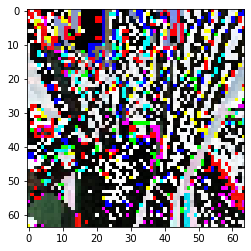

[[[245 246 252]
  [254 255   5]
  [  9   9   9]
  ...
  [230 236 244]
  [249 248 242]
  [ 12  11   4]]

 [[248 249 255]
  [240 241 247]
  [  6   6   6]
  ...
  [235 241 246]
  [ 12  11   4]
  [ 13  12   5]]

 [[253  13  12]
  [240   0 255]
  [ 14  18  14]
  ...
  [235 241 248]
  [ 18  10   0]
  [ 19  11   1]]

 ...

 [[ 74  90  71]
  [ 61  77  58]
  [255 255 255]
  ...
  [  4   7   2]
  [  0   1 254]
  [253 254 251]]

 [[ 54  89  56]
  [ 63  98  65]
  [ 58  81  60]
  ...
  [  1   4   1]
  [ 10  13   6]
  [ 23  26  19]]

 [[ 53  88  55]
  [ 55  90  57]
  [ 57  80  59]
  ...
  [  8  11   8]
  [  6   9   2]
  [ 23  26  19]]]


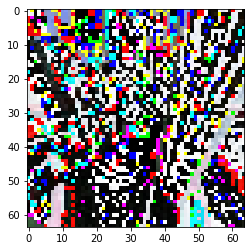

[[[  4   5   0]
  [255   0 251]
  [248 248 248]
  ...
  [  2   2   0]
  [  5   1 253]
  [  5   1 253]]

 [[  9  10   5]
  [  0   1 252]
  [254 254 254]
  ...
  [245 245 246]
  [ 21  17  13]
  [ 22  18  14]]

 [[  3   3   3]
  [245 245 245]
  [250 247 248]
  ...
  [  3   1 255]
  [ 17  17  17]
  [ 16  16  16]]

 ...

 [[250 253 250]
  [  6   9   6]
  [254 247   3]
  ...
  [ 10  14  10]
  [251   1 248]
  [ 32  38  29]]

 [[  4   4   6]
  [251 251 253]
  [  3 253   6]
  ...
  [ 43  43  41]
  [ 14  18  14]
  [242 246 242]]

 [[247 247 249]
  [254 254   0]
  [ 14   8  17]
  ...
  [  5   5   3]
  [ 36  40  36]
  [  1   5   1]]]


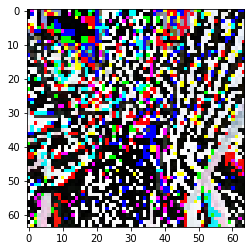

[[[255 255   1]
  [255 255   1]
  [242 253  40]
  ...
  [  0   0   0]
  [242 245 255]
  [253   0   7]]

 [[241 241 243]
  [  1   1   3]
  [246   1  44]
  ...
  [  0   0   0]
  [236 239 246]
  [234 237 244]]

 [[241 238 241]
  [  3   0   3]
  [251   3  24]
  ...
  [  0   2   2]
  [238 240 242]
  [238 240 242]]

 ...

 [[254 245   1]
  [212 203 215]
  [208 186 200]
  ...
  [244 220 239]
  [251 244   0]
  [208 201 213]]

 [[  6 255   9]
  [209 202 212]
  [241 207 225]
  ...
  [218 189 207]
  [243 229 241]
  [ 12 254  10]]

 [[  2 251   5]
  [212 205 215]
  [231 197 215]
  ...
  [246 217 235]
  [198 184 196]
  [249 235 247]]]


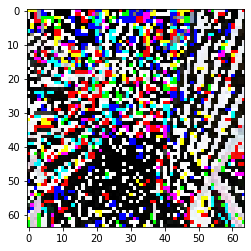

[[[  1   1   1]
  [  2   2   2]
  [139 150 191]
  ...
  [ 34  26  16]
  [ 30  25  12]
  [ 19  14   4]]

 [[  2   2   2]
  [  4   4   4]
  [141 152 193]
  ...
  [ 23  15   5]
  [ 21  16   6]
  [ 20  15   5]]

 [[  3   2   5]
  [  3   2   5]
  [143 153 188]
  ...
  [  0 254 254]
  [ 17  15  13]
  [ 17  15  13]]

 ...

 [[250 211 229]
  [ 25 242   4]
  [  6  14   6]
  ...
  [ 18 251 250]
  [ 53  13  26]
  [ 14 230 243]]

 [[228 195 210]
  [ 23 246   5]
  [231 248 242]
  ...
  [ 43  28  22]
  [ 19 241 245]
  [ 40   6  10]]

 [[238 205 220]
  [ 27 250   9]
  [231 248 242]
  ...
  [ 38  23  17]
  [ 38   4   8]
  [ 28 250 254]]]


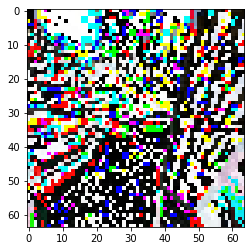

[[[245   2  47]
  [135 148 193]
  [254 254 254]
  ...
  [226 231 240]
  [224 230 244]
  [238 244 249]]

 [[245   2  47]
  [136 149 194]
  [252 252 252]
  ...
  [235 240 251]
  [233 239 244]
  [238 244 249]]

 [[254   8  21]
  [144 154 167]
  [252 255 254]
  ...
  [252 254   0]
  [233 238 244]
  [238 243 249]]

 ...

 [[250  36  17]
  [  1  43  24]
  [ 20  34  28]
  ...
  [232 243 248]
  [193 200 202]
  [252   3   5]]

 [[  6  39  24]
  [  5  38  23]
  [ 22  38  29]
  ...
  [205 216 226]
  [230 240 248]
  [191 201 209]]

 [[  4  37  22]
  [  3  36  21]
  [ 26  42  33]
  ...
  [219 230 240]
  [238 248   0]
  [238 248   0]]]


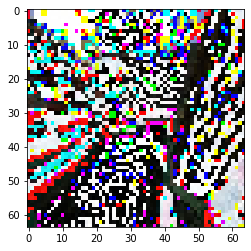

[[[147 151 142]
  [254   2 249]
  [255 255 253]
  ...
  [ 38  32  26]
  [ 24  20   7]
  [ 17  13   9]]

 [[ 40  44  35]
  [119 123 114]
  [255 255 253]
  ...
  [ 17  11   3]
  [ 14  10   6]
  [ 18  14  10]]

 [[ 75  48  18]
  [165 138 108]
  [134 120  80]
  ...
  [  1 252 253]
  [ 14   9   1]
  [  9   4 252]]

 ...

 [[248 248 248]
  [  9   9   9]
  [250 253 252]
  ...
  [  1  30  18]
  [  9  38  28]
  [249  22  12]]

 [[  9  13   9]
  [  0   4   0]
  [  2   6   2]
  ...
  [255  29  14]
  [252  27  14]
  [  0  31  18]]

 [[  0   4   0]
  [  2   6   2]
  [  3   7   3]
  ...
  [248  22   7]
  [249  24  11]
  [231   6 249]]]


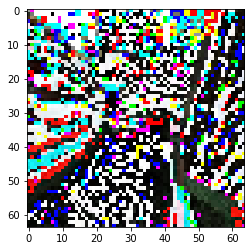

[[[162 147 125]
  [ 12 253 231]
  [255   0 253]
  ...
  [234 235 232]
  [239 239 249]
  [250 250 252]]

 [[ 27  12 246]
  [ 25  10 244]
  [255   0 253]
  ...
  [254 255 253]
  [  0   0   2]
  [248 248 250]]

 [[231 233 235]
  [ 17  19  21]
  [  3   0   1]
  ...
  [  0   0   0]
  [254   1   2]
  [  0   3   4]]

 ...

 [[ 11  11  11]
  [249 249 249]
  [ 17  18  13]
  ...
  [ 22  25  18]
  [ 11  13   8]
  [ 13  15  10]]

 [[245 245 245]
  [ 11  11  11]
  [  0   0 254]
  ...
  [ 11  14   7]
  [ 15  18  13]
  [ 16  19  14]]

 [[253 253 253]
  [  0   0   0]
  [ 12  12  10]
  ...
  [ 18  21  14]
  [ 10  13   8]
  [  5   8   3]]]


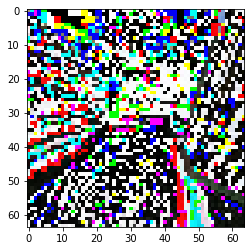

[[[ 25  13 243]
  [135 123  97]
  [  5   0 233]
  ...
  [ 88 128 188]
  [  9  12   3]
  [247 250 249]]

 [[  2 246 220]
  [ 43  31   5]
  [151 146 123]
  ...
  [ 63 103 162]
  [244 247 247]
  [247 250 249]]

 [[ 24  17  17]
  [248 241 241]
  [ 16  17 244]
  ...
  [ 81 106 133]
  [254 253   0]
  [242 241 247]]

 ...

 [[ 13  16  10]
  [ 41  44  38]
  [  4  11 255]
  ...
  [251 229 241]
  [250 253 250]
  [  2   5   2]]

 [[ 12  15   7]
  [  4   7 255]
  [ 10  13   7]
  ...
  [251 222 236]
  [246 246 246]
  [ 10  10  10]]

 [[ 26  29  21]
  [ 10  13   5]
  [  6   9   3]
  ...
  [  5 232 246]
  [255 255 255]
  [254 254 254]]]


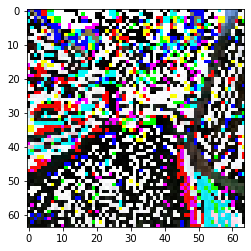

[[[223 230 232]
  [ 38  45  47]
  [205 205 158]
  ...
  [  2   2   2]
  [ 67  96 124]
  [ 39  68  96]]

 [[  2   9  11]
  [221 228 230]
  [  6   6 215]
  ...
  [  0   0   0]
  [ 74 103 130]
  [ 26  55  83]]

 [[ 14   0 254]
  [ 24  10   8]
  [ 46  41  39]
  ...
  [238 248 246]
  [ 32  59  76]
  [ 32  59  73]]

 ...

 [[245 244 247]
  [228 227 230]
  [252 246 255]
  ...
  [ 11 245 245]
  [ 30   0  21]
  [ 38   8  29]]

 [[  3   1   4]
  [238 236 239]
  [255   5 252]
  ...
  [ 18   4   6]
  [ 38 255  15]
  [ 35 252  12]]

 [[231 229 232]
  [ 20  18  21]
  [ 21  27  18]
  ...
  [  7 249 251]
  [ 12 229 245]
  [ 38 255  15]]]


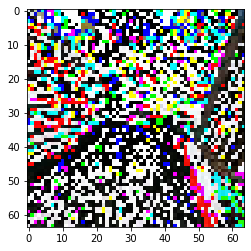

[[[ 45  15  16]
  [  0 226 227]
  [253 195 175]
  ...
  [ 16  23  50]
  [ 40  55 115]
  [ 68  83 143]]

 [[254 224 225]
  [ 33   3   4]
  [ 46 244 224]
  ...
  [ 46  53  80]
  [ 37  52 112]
  [ 82  97 157]]

 [[237 244 250]
  [224 231 237]
  [250 217 225]
  ...
  [ 49  62 117]
  [ 74  92 151]
  [ 84 102 161]]

 ...

 [[251 250 248]
  [246 245 243]
  [ 20  25  19]
  ...
  [  6   7   9]
  [  5 242 229]
  [248 229 216]]

 [[  0   2   1]
  [ 18  20  19]
  [ 20  20  22]
  ...
  [ 11   5   1]
  [253 247 244]
  [240 234 231]]

 [[ 18  20  19]
  [238 240 239]
  [241 241 243]
  ...
  [ 12   6   2]
  [ 12   6   3]
  [254 248 245]]]


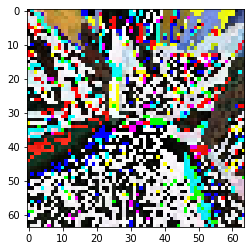

[[[ 20  14  12]
  [ 17  11   9]
  [233 240 244]
  ...
  [255 255   1]
  [  2 255 247]
  [  2 255 247]]

 [[ 19  13  11]
  [ 25  19  17]
  [  8  15  19]
  ...
  [255 255   1]
  [  1 254 246]
  [  1 254 246]]

 [[  8   1 255]
  [ 25  18  16]
  [ 20  20  18]
  ...
  [ 11   0 215]
  [141 120  47]
  [141 120  47]]

 ...

 [[ 10  12  11]
  [ 10  12  11]
  [  9   6   9]
  ...
  [248 248 248]
  [  8   8   8]
  [ 27  27  27]]

 [[253   0 251]
  [ 23  26  21]
  [  8   5   9]
  ...
  [241 251   1]
  [247 249 248]
  [  6   8   7]]

 [[ 23  26  21]
  [249 252 247]
  [231 228 232]
  ...
  [240 250   0]
  [247 249 248]
  [246 248 247]]]


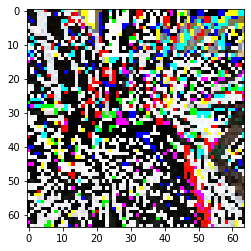

[[[220 226 230]
  [245 251 255]
  [  1   9   9]
  ...
  [139 116  33]
  [127 118  90]
  [ 16   7 235]]

 [[252   2   6]
  [221 227 231]
  [240 248 248]
  ...
  [139 116  33]
  [ 17   8 236]
  [ 16   7 235]]

 [[242 248 253]
  [245 251   0]
  [239 239 241]
  ...
  [ 11   8 255]
  [126 142 201]
  [127 143 202]]

 ...

 [[  3   3   3]
  [  1   1   1]
  [228 228 230]
  ...
  [242 246 250]
  [215 235 253]
  [205 225 243]]

 [[  5   2   7]
  [230 227 232]
  [220 217 222]
  ...
  [ 19  15  11]
  [224 233 239]
  [225 234 240]]

 [[238 235 240]
  [253 250 255]
  [253 250 255]
  ...
  [ 19  15  11]
  [225 234 240]
  [240 249 255]]]


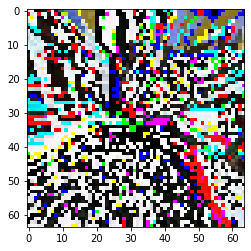

[[[215 242 244]
  [228 255   1]
  [ 26  22  19]
  ...
  [133 148 209]
  [139 148 165]
  [244 253  14]]

 [[240  11  13]
  [221 248 250]
  [ 20  16  13]
  ...
  [136 151 212]
  [245 254  15]
  [215 224 241]]

 [[ 18  12   7]
  [ 11   5   0]
  [ 15   9   5]
  ...
  [241 251  33]
  [230 222 200]
  [228 220 198]]

 ...

 [[  3   6   1]
  [ 14  17  12]
  [  7   7   5]
  ...
  [244   1   3]
  [247 237 227]
  [252 242 232]]

 [[ 14  14  12]
  [  6   6   4]
  [ 17  17  17]
  ...
  [217   1 248]
  [ 29  23  18]
  [ 27  21  16]]

 [[254 254 252]
  [ 16  16  14]
  [  2   2   2]
  ...
  [218   2 249]
  [ 26  20  15]
  [ 26  20  15]]]


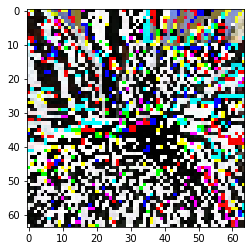

[[[ 25  26  21]
  [248 249 244]
  [226 251 254]
  ...
  [253 254 245]
  [  4 253 226]
  [187 180 153]]

 [[  4   5   0]
  [ 23  24  19]
  [224 249 252]
  ...
  [178 179 170]
  [194 187 160]
  [222 215 188]]

 [[  3   3   1]
  [  6   6   4]
  [230   6   8]
  ...
  [194 183 137]
  [193 189 161]
  [195 191 163]]

 ...

 [[248 245 250]
  [230 227 232]
  [ 19  19  19]
  ...
  [  1  14   7]
  [ 11  13  14]
  [241 243 244]]

 [[251 254 251]
  [ 18  21  18]
  [ 12  15  10]
  ...
  [  1   1   3]
  [234 245 244]
  [246   1   0]]

 [[  8  11   8]
  [ 13  16  13]
  [ 13  16  11]
  ...
  [246 246 248]
  [254   9   8]
  [234 245 244]]]


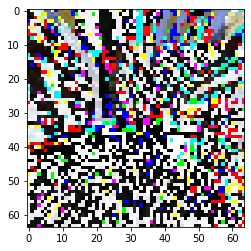

[[[212 220 229]
  [227 235 244]
  [214 222 226]
  ...
  [213 156  89]
  [209 155 107]
  [ 37 239 191]]

 [[199 207 216]
  [220 228 237]
  [210 218 222]
  ...
  [ 30 229 162]
  [ 29 231 183]
  [ 30 232 184]]

 [[179 221 231]
  [185 227 237]
  [209 221 226]
  ...
  [ 30 234 199]
  [ 42 251 230]
  [ 44 253 232]]

 ...

 [[ 17  17  15]
  [ 26  26  24]
  [247 247 247]
  ...
  [  9 241 247]
  [ 21  15  10]
  [ 50  44  39]]

 [[243 243 245]
  [247 247 249]
  [231 228 231]
  ...
  [248 232 249]
  [  9 255   3]
  [253 243 247]]

 [[243 243 245]
  [240 240 242]
  [  2 255   2]
  ...
  [ 24   8  25]
  [247 237 241]
  [  9 255   3]]]


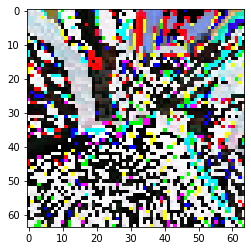

[[[  3   5   2]
  [  8  10   7]
  [  5   3   3]
  ...
  [  7   4   5]
  [  5   5   3]
  [248 248 246]]

 [[ 14  16  13]
  [250 252 249]
  [244 242 242]
  ...
  [  1 254 255]
  [251 251 249]
  [253 253 251]]

 [[ 18  20  16]
  [  0   2 254]
  [245 243 244]
  ...
  [249 252 253]
  [236  13   8]
  [220 253 248]]

 ...

 [[231 231 233]
  [247 247 249]
  [248 248 250]
  ...
  [ 22  16  11]
  [ 21  20  18]
  [231 230 228]]

 [[250 247 250]
  [250 247 250]
  [  0 253   3]
  ...
  [ 16 254 251]
  [ 37  31  28]
  [251 245 242]]

 [[254 251 254]
  [252 249 252]
  [243 240 246]
  ...
  [  7 245 242]
  [ 21  15  12]
  [ 25  19  16]]]


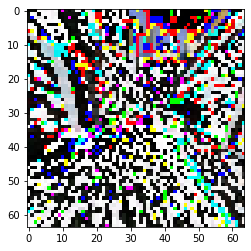

[[[  2   2   2]
  [250 250 250]
  [251 249 252]
  ...
  [245 253 254]
  [233   9   9]
  [222 254 254]]

 [[248 248 248]
  [  4   4   4]
  [  8   6   9]
  ...
  [255   7   8]
  [219 251 251]
  [186 218 218]]

 [[254 252 254]
  [246 244 246]
  [  6   6   6]
  ...
  [233   1 251]
  [222 200 206]
  [ 29   7  13]]

 ...

 [[  6   6   6]
  [ 14  14  14]
  [  8  11   6]
  ...
  [246 246 246]
  [210 215 223]
  [238 243 251]]

 [[ 25  29  21]
  [  8  12   4]
  [ 25  28  20]
  ...
  [ 40  33  24]
  [228 233 233]
  [241 246 246]]

 [[ 16  20  12]
  [ 18  22  14]
  [ 19  22  14]
  ...
  [ 27  20  11]
  [ 17  22  22]
  [227 232 232]]]


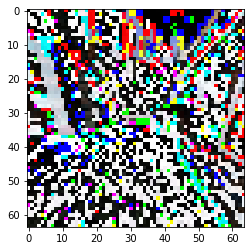

[[[251 249 252]
  [250 248 251]
  [254   0 253]
  ...
  [228   4 252]
  [236 216 216]
  [ 26   6   6]]

 [[241 239 242]
  [250 248 251]
  [  8  10   7]
  ...
  [206 238 230]
  [ 26   6   6]
  [ 65  45  45]]

 [[243 241 244]
  [  1 255   2]
  [  5   7   6]
  ...
  [ 31  21  22]
  [ 66  57  55]
  [245 236 234]]

 ...

 [[252 252 250]
  [239 239 237]
  [242 239 244]
  ...
  [ 45  37  31]
  [ 32  38  40]
  [ 45  51  53]]

 [[228 227 230]
  [  1   0   3]
  [  5   8   7]
  ...
  [246 247 249]
  [ 24  20  17]
  [ 39  35  32]]

 [[  3   2   5]
  [  7   6   9]
  [251 254 253]
  ...
  [232 233 235]
  [236 232 229]
  [ 24  20  17]]]


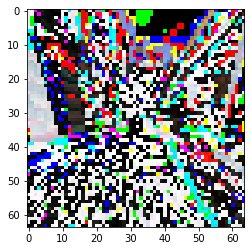

[[[ 17  25  16]
  [  3  11   2]
  [ 13  15  13]
  ...
  [254 239 249]
  [ 16   4   6]
  [ 17   5   7]]

 [[ 31  39  30]
  [ 18  26  17]
  [ 11  13  11]
  ...
  [ 15   0  10]
  [ 17   5   7]
  [255 243 245]]

 [[  1   5   0]
  [ 20  24  19]
  [246 252 246]
  ...
  [251 239 243]
  [241 241 241]
  [ 31  31  31]]

 ...

 [[ 12  12  10]
  [  9   9   7]
  [ 11  11   9]
  ...
  [239 243 246]
  [ 16   2 245]
  [  3 245 232]]

 [[ 21  21  21]
  [250 250 250]
  [ 10  10  12]
  ...
  [247 243 240]
  [  6   3   2]
  [  7   4   3]]

 [[236 236 236]
  [ 10  10  10]
  [240 240 242]
  ...
  [  6   2 255]
  [  4   1   0]
  [  6   3   2]]]


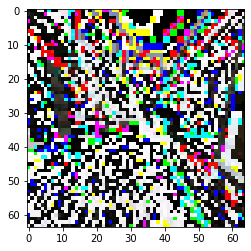

[[[247 243 247]
  [ 15  11  15]
  [  0   4   0]
  ...
  [ 44  19  16]
  [ 12  12  12]
  [243 243 243]]

 [[251 247 251]
  [247 243 247]
  [254   2 254]
  ...
  [ 41  16  13]
  [243 243 243]
  [ 22  22  22]]

 [[ 18  24  19]
  [255   5   0]
  [  8   4   8]
  ...
  [245 248 249]
  [ 17  12  12]
  [242 237 237]]

 ...

 [[247 247 249]
  [244 244 246]
  [247 247 249]
  ...
  [241 244 245]
  [243 241 242]
  [  5   3   4]]

 [[  1 254 255]
  [  7   4   5]
  [221 218 221]
  ...
  [  7   3   0]
  [  4   2   1]
  [  5   3   2]]

 [[ 21  18  19]
  [221 218 219]
  [  7   4   7]
  ...
  [ 42  38  35]
  [ 22  20  19]
  [  4   2   1]]]


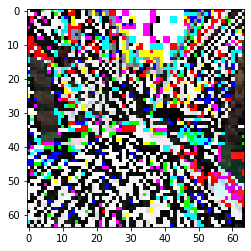

[[[  6   9   8]
  [242 245 244]
  [251 247 251]
  ...
  [243 251 252]
  [  2   4   5]
  [ 27  29  30]]

 [[255   2   1]
  [  7  10   9]
  [255 251 255]
  ...
  [224 232 233]
  [251 253 254]
  [247 249 250]]

 [[230 222 229]
  [253 245 252]
  [  2   0   2]
  ...
  [  4   1   2]
  [248 255   3]
  [233 240 244]]

 ...

 [[ 23  27  21]
  [251 255 249]
  [250 250 250]
  ...
  [227 242 246]
  [215   5   2]
  [201 247 244]]

 [[ 12  16  12]
  [  7  11   7]
  [  9   7   8]
  ...
  [236 240 245]
  [208 228 234]
  [218 238 244]]

 [[  7  11   7]
  [254   2 254]
  [251 249 250]
  ...
  [235 239 244]
  [208 228 234]
  [208 228 234]]]


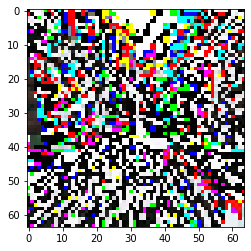

[[[  1 254 255]
  [ 13  10  11]
  [251 247 252]
  ...
  [  0   0   0]
  [ 37  31  24]
  [251 245 238]]

 [[251 248 249]
  [247 244 245]
  [241 237 242]
  ...
  [ 29  29  29]
  [ 15   9   2]
  [252 246 239]]

 [[ 10  10  10]
  [253 253 253]
  [243 241 244]
  ...
  [ 33  26  17]
  [ 20  20  20]
  [  2   2   2]]

 ...

 [[243 237 246]
  [254 248   1]
  [ 16  20  12]
  ...
  [  9  38  22]
  [ 21  28  17]
  [ 17  24  13]]

 [[225 219 226]
  [225 219 226]
  [ 13  15  10]
  ...
  [ 12  33  31]
  [  7  39  22]
  [254  30  13]]

 [[225 219 226]
  [ 25  19  26]
  [ 11  13   8]
  ...
  [207 228 226]
  [  6  38  21]
  [ 12  44  27]]]


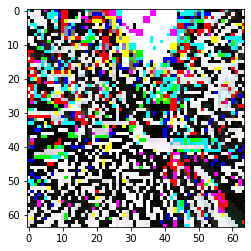

[[[246 246 246]
  [  1   1   1]
  [250 250 250]
  ...
  [  3 254 252]
  [  0   0   0]
  [244 244 244]]

 [[  4   4   4]
  [  2   2   2]
  [  0   0   0]
  ...
  [  2 253 251]
  [  0   0   0]
  [ 26  26  26]]

 [[  3   3   3]
  [  1   1   1]
  [  0   0   0]
  ...
  [255   0   2]
  [241 243 242]
  [255   1   0]]

 ...

 [[252 255 247]
  [ 22  25  17]
  [  2 254   4]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 22  24  21]
  [ 22  24  21]
  [230 230 232]
  ...
  [  0 255   2]
  [  2 255   0]
  [  4   1   2]]

 [[255   1 254]
  [255   1 254]
  [  0   0   2]
  ...
  [  0 255   2]
  [  2 255   0]
  [253 250 251]]]


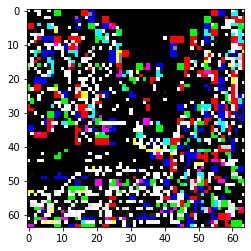

[[[252 248 253]
  [239 235 240]
  [253   1   0]
  ...
  [238 238 240]
  [252 253   2]
  [  6   7  12]]

 [[240 236 241]
  [249 245 250]
  [254   2   1]
  ...
  [249 249 251]
  [248 249 254]
  [223 224 229]]

 [[243 240 246]
  [235 232 238]
  [  1 254 253]
  ...
  [232 236 240]
  [242 236 232]
  [ 15   9   5]]

 ...

 [[255 254   1]
  [245 244 247]
  [241 241 241]
  ...
  [  2 217 235]
  [243 238 247]
  [243 238 247]]

 [[245 245 247]
  [241 241 243]
  [252 252 252]
  ...
  [239 227 231]
  [246 245 250]
  [241 240 245]]

 [[ 21  21  23]
  [222 222 224]
  [238 238 238]
  ...
  [ 10 254   2]
  [250 249 254]
  [246 245 250]]]


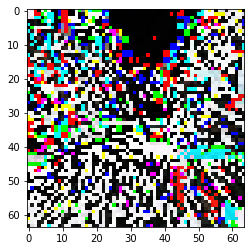

[[[255 255 255]
  [255 255 255]
  [  3 255   0]
  ...
  [  9   9   7]
  [214 213 208]
  [ 23  22  17]]

 [[255 255 255]
  [255 255 255]
  [  1 253 254]
  ...
  [251 251 249]
  [ 38  37  32]
  [ 21  20  15]]

 [[ 17   6   3]
  [255 244 241]
  [  0   0   2]
  ...
  [ 28  24  20]
  [ 24  20  16]
  [ 20  16  12]]

 ...

 [[254 252   1]
  [250 248 253]
  [248 246 249]
  ...
  [244  32  15]
  [  2   3   0]
  [  8   9   6]]

 [[250 248 251]
  [248 246 249]
  [  9  13   7]
  ...
  [255  29  16]
  [  2   3   0]
  [  2   3   0]]

 [[235 233 236]
  [ 16  14  17]
  [ 30  34  28]
  ...
  [237  11 254]
  [255   0 253]
  [  2   3   0]]]


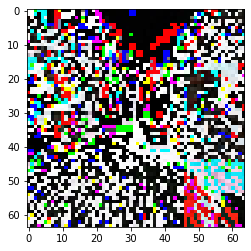

[[[  1   1   1]
  [255 255 255]
  [  0   2 255]
  ...
  [ 35  31  27]
  [ 29  29  29]
  [  1   1   1]]

 [[255 255 255]
  [  0   0   0]
  [255   1 254]
  ...
  [ 17  13   9]
  [221 221 221]
  [  0   0   0]]

 [[  7   9   8]
  [ 18  20  19]
  [ 10  10  10]
  ...
  [222 226 230]
  [  6  10  14]
  [238 242 246]]

 ...

 [[255   1 254]
  [255   1 254]
  [ 34  40  31]
  ...
  [243 234 246]
  [251 224 240]
  [243 216 232]]

 [[255   1 254]
  [ 36  38  35]
  [249 245 249]
  ...
  [230 234 239]
  [241 236 244]
  [237 232 240]]

 [[249 251 248]
  [248 250 247]
  [252 248 252]
  ...
  [250 254   3]
  [243 238 246]
  [248 243 251]]]


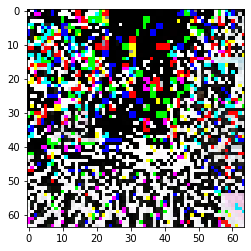

[[[255 255 255]
  [  0   0   0]
  [  1   1   3]
  ...
  [215 221 228]
  [242 255   8]
  [207 220 229]]

 [[  8   8   8]
  [  7   7   7]
  [  2   2   4]
  ...
  [255   5  12]
  [242 255   8]
  [208 221 230]]

 [[244 251 253]
  [248 255   1]
  [ 10   5   3]
  ...
  [250 248 246]
  [ 10   6   2]
  [ 24  20  16]]

 ...

 [[245 245 245]
  [ 23  23  23]
  [250 246 250]
  ...
  [ 13  16  10]
  [  2   0 252]
  [  8   6   2]]

 [[253 251 252]
  [222 220 221]
  [ 15  15  17]
  ...
  [ 14  16  15]
  [255   1   0]
  [ 13  15  14]]

 [[  9   7   8]
  [ 14  12  13]
  [238 238 240]
  ...
  [  2   4   3]
  [  6   8   7]
  [248 250 249]]]


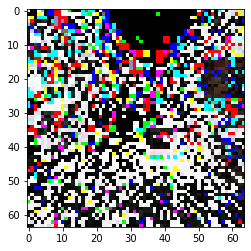

[[[  0 253 254]
  [  5   2   3]
  [  7 249 250]
  ...
  [253 248 246]
  [255 246 241]
  [ 12   3 254]]

 [[  3   0   1]
  [  2 255   0]
  [  9 251 252]
  ...
  [ 18  13  11]
  [ 41  32  27]
  [  9   0 251]]

 [[ 18   5   1]
  [ 33  20  16]
  [253   0   3]
  ...
  [ 33  32  35]
  [212 222 232]
  [228 238 248]]

 ...

 [[ 21  21  19]
  [249 249 247]
  [222 220 225]
  ...
  [246 246 246]
  [  2   4   8]
  [246 248 252]]

 [[  0   0   2]
  [  0   0   2]
  [246 244 247]
  ...
  [249 251 247]
  [ 12  12  10]
  [250 250 248]]

 [[  0   0   2]
  [245 245 247]
  [  8   6   9]
  ...
  [ 16  18  14]
  [251 251 249]
  [ 11  11   9]]]


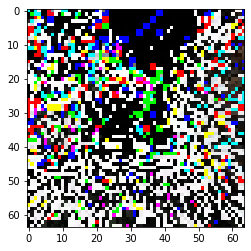

[[[ 15   8   6]
  [  4 253 251]
  [  3 248 249]
  ...
  [254   1   2]
  [ 14  12  10]
  [254 252 250]]

 [[ 28  21  19]
  [ 12   5   3]
  [  2 247 248]
  ...
  [227 230 231]
  [225 223 221]
  [ 50  48  46]]

 [[250   1   0]
  [ 11  18  17]
  [  2 253 250]
  ...
  [236 239 238]
  [ 43  31  22]
  [ 21   9   0]]

 ...

 [[ 10  10  10]
  [251 251 251]
  [ 26  28  23]
  ...
  [  0   0 254]
  [253 251 249]
  [  2   0 254]]

 [[ 12  18   9]
  [ 16  22  13]
  [ 16  18  13]
  ...
  [  9   9   9]
  [248 248 250]
  [247 247 249]]

 [[ 16  22  13]
  [ 14  20  11]
  [252 254 249]
  ...
  [254 254 254]
  [ 11  11  13]
  [250 250 252]]]


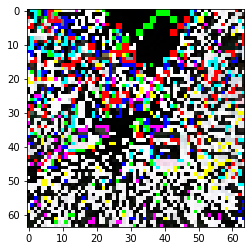

[[[  7   7   7]
  [  0   0   0]
  [  2 254 251]
  ...
  [ 10  16  20]
  [253 255   1]
  [253 255   1]]

 [[ 15  15  15]
  [255 255 255]
  [ 43  39  36]
  ...
  [236 242 246]
  [253 255   1]
  [236 238 240]]

 [[253 254   3]
  [212 213 218]
  [  8   2   2]
  ...
  [ 25  23  21]
  [236 238 237]
  [  2   4   3]]

 ...

 [[243 243 243]
  [ 10  10  10]
  [244 244 246]
  ...
  [249 247 252]
  [  0   2   4]
  [251 253 255]]

 [[243 239 245]
  [246 242 248]
  [244 244 246]
  ...
  [242 240 242]
  [249 247 248]
  [  5   3   4]]

 [[246 242 248]
  [246 242 248]
  [  0   0   2]
  ...
  [242 240 242]
  [240 238 239]
  [248 246 247]]]


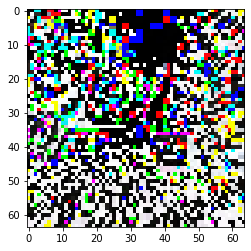

[[[253 255   1]
  [250 252 254]
  [  5   2 255]
  ...
  [ 35  26  21]
  [  2   0 254]
  [  5   3   1]]

 [[211 213 215]
  [248 250 252]
  [252 249 246]
  ...
  [  8 255 250]
  [  5   3   1]
  [ 19  17  15]]

 [[  7   6   1]
  [ 29  28  23]
  [251   0 254]
  ...
  [224 226 228]
  [239 241 243]
  [254   0   2]]

 ...

 [[ 20  24  20]
  [255   3 255]
  [ 17  21  15]
  ...
  [253 252 255]
  [  6   6   4]
  [  8   8   6]]

 [[  0 254   1]
  [249 247 250]
  [  0   0 254]
  ...
  [  8   6   9]
  [  7   7   7]
  [247 247 247]]

 [[249 247 250]
  [  1 255   2]
  [ 15  15  13]
  ...
  [  4   2   5]
  [  9   9   9]
  [  7   7   7]]]


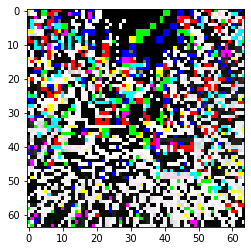

[[[ 32  15  11]
  [ 49  32  28]
  [  1   6   6]
  ...
  [252 255 254]
  [238 240 242]
  [252 254   0]]

 [[ 26   9   5]
  [ 32  15  11]
  [ 18  23  23]
  ...
  [  6   9   8]
  [252 254   0]
  [  0   2   4]]

 [[ 25  24  27]
  [240 239 242]
  [242 241 244]
  ...
  [249 254   0]
  [ 32  34  38]
  [236 238 242]]

 ...

 [[224 218 225]
  [239 233 240]
  [250 246 250]
  ...
  [ 15 243 250]
  [  7 250 249]
  [ 28  15  14]]

 [[  6   8   5]
  [ 18  20  17]
  [  5   5   5]
  ...
  [  1 228 238]
  [  5 232 242]
  [ 30   1  11]]

 [[254   0 253]
  [ 17  19  16]
  [  3   3   3]
  ...
  [ 21 248   2]
  [  0 227 237]
  [ 16 243 253]]]


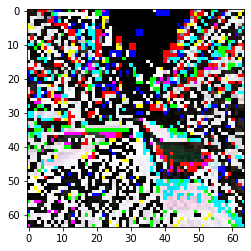

[[[255 250 248]
  [ 26  21  19]
  [  1 255   0]
  ...
  [207 224 218]
  [236 236 238]
  [ 34  34  36]]

 [[  4 255 253]
  [ 23  18  16]
  [  2   0   1]
  ...
  [  1  18  12]
  [  1   1   3]
  [222 222 224]]

 [[  4   2   3]
  [  2   0   1]
  [  2   3   0]
  ...
  [  5   2   1]
  [217 219 218]
  [255   1   0]]

 ...

 [[ 14  16  15]
  [  0   2   1]
  [239 237 242]
  ...
  [ 17  14  13]
  [247 250 254]
  [234 237 241]]

 [[  1   1   1]
  [238 238 238]
  [242 242 244]
  ...
  [  6   6   6]
  [  7   4   3]
  [251 248 247]]

 [[ 20  20  20]
  [242 242 242]
  [242 242 244]
  ...
  [242 242 242]
  [ 18  15  14]
  [253 250 249]]]


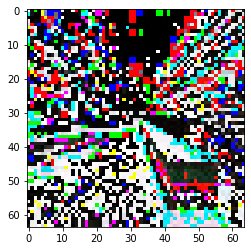

[[[  3   3   5]
  [201 201 203]
  [  3   5   6]
  ...
  [242  17  20]
  [  9  21  19]
  [230 242 240]]

 [[ 11  11  13]
  [  2   2   4]
  [203 205 206]
  ...
  [213 244 247]
  [230 242 240]
  [  7  19  17]]

 [[217 224 224]
  [237 244 244]
  [  4   0   4]
  ...
  [236 241 239]
  [ 22  18  15]
  [ 24  20  17]]

 ...

 [[241 241 241]
  [  0   0   0]
  [255 255 255]
  ...
  [214 234 238]
  [227 245 248]
  [227 245 248]]

 [[  1   5 255]
  [ 24  28  22]
  [ 35  35  35]
  ...
  [231 237 240]
  [228 236 243]
  [234 242 249]]

 [[  6  10   4]
  [ 20  24  18]
  [252 252 252]
  ...
  [249 255   2]
  [217 225 232]
  [234 242 249]]]


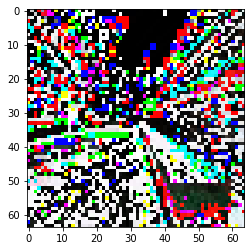

[[[ 25  22  18]
  [  4   1 253]
  [  0   0   0]
  ...
  [  6 255 255]
  [243  11  10]
  [216 240 239]]

 [[ 21  18  14]
  [  5   2 254]
  [  2   2   2]
  ...
  [ 18  11  11]
  [248  16  15]
  [204 228 227]]

 [[252 252 252]
  [  2   2   2]
  [  2   3   0]
  ...
  [255  30  22]
  [ 17  24  28]
  [231 238 242]]

 ...

 [[  9   9   9]
  [  0   0   0]
  [ 31  33  28]
  ...
  [ 19  33  19]
  [ 24  28  19]
  [ 12  16   7]]

 [[255 251 255]
  [  5   1   5]
  [230 230 228]
  ...
  [ 16  41  25]
  [ 13  41  22]
  [  7  35  16]]

 [[243 239 243]
  [227 223 227]
  [  7   7   5]
  ...
  [  0  25   9]
  [ 39  67  48]
  [ 29  57  38]]]


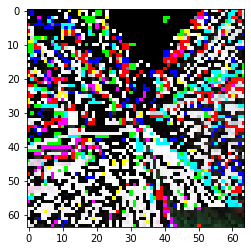

[[[249   4   5]
  [248   3   4]
  [242   2   1]
  ...
  [ 57  16  19]
  [ 30  29  24]
  [  6   5   0]]

 [[208 219 220]
  [247   2   3]
  [245   5   4]
  ...
  [ 52  11  14]
  [  7   6   1]
  [ 37  36  31]]

 [[251 244 246]
  [  9   2   4]
  [  7  11  12]
  ...
  [247 250   2]
  [189 199 203]
  [228 238 242]]

 ...

 [[252 250 251]
  [254 252 253]
  [230 230 232]
  ...
  [ 14 230 237]
  [  4 236 241]
  [ 30   6  11]]

 [[ 23  27  23]
  [249 253 249]
  [253 253 255]
  ...
  [ 36   7  15]
  [ 15 232 240]
  [ 31 248   0]]

 [[  0   4   0]
  [ 17  21  17]
  [  7   7   9]
  ...
  [ 20 247 255]
  [ 20 237 245]
  [  9 226 234]]]


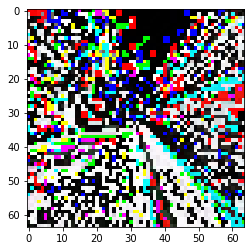

[[[198 201 205]
  [255   2   6]
  [254 255  23]
  ...
  [247 249 250]
  [252   1   2]
  [  0   5   6]]

 [[255   2   6]
  [204 207 211]
  [253 254  22]
  ...
  [232 234 235]
  [  0   5   6]
  [237 242 243]]

 [[ 28  24  21]
  [ 12   8   5]
  [237 239 239]
  ...
  [  2 246 250]
  [ 14  26  24]
  [ 25  37  35]]

 ...

 [[254 254   0]
  [248 248 250]
  [  0   0   0]
  ...
  [ 16  19  18]
  [ 37  29  22]
  [ 39  31  24]]

 [[232 226 233]
  [250 244 251]
  [  4   4   4]
  ...
  [250 239 238]
  [ 34  30  27]
  [ 18  14  11]]

 [[242 236 243]
  [243 237 244]
  [  4   4   4]
  ...
  [ 40  29  28]
  [245 241 238]
  [ 18  14  11]]]


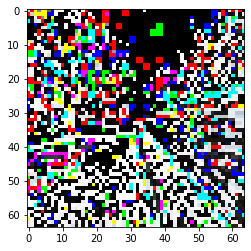

[[[255   2   1]
  [ 10  13  12]
  [248  13  33]
  ...
  [204 241 240]
  [224 223 230]
  [241 240 247]]

 [[  6   9   8]
  [ 44  47  46]
  [251  16  36]
  ...
  [215 252 251]
  [241 240 247]
  [234 233 240]]

 [[ 18  23  21]
  [252   1 255]
  [  2   0   2]
  ...
  [246 237 238]
  [250 228 226]
  [239 217 215]]

 ...

 [[  7   9   6]
  [  8  10   7]
  [250 250 250]
  ...
  [253 254   3]
  [219 225 232]
  [219 225 232]]

 [[ 15  17  14]
  [245 247 244]
  [  6   6   6]
  ...
  [  0   0   0]
  [237 242 248]
  [219 224 230]]

 [[  8  10   7]
  [  8  10   7]
  [241 241 241]
  ...
  [240 240 240]
  [251   0   6]
  [236 241 247]]]


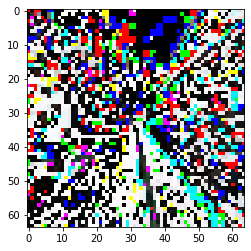

[[[254   0   1]
  [254   0   1]
  [  2   2   2]
  ...
  [252  10   7]
  [  6 228 228]
  [ 37   3   3]]

 [[255   1   2]
  [253 255   0]
  [255 255 255]
  ...
  [ 13  27  24]
  [ 36   2   2]
  [ 44  10  10]]

 [[219 214 216]
  [254 249 251]
  [  3   3   3]
  ...
  [ 25  36  41]
  [ 22  19  18]
  [ 22  19  18]]

 ...

 [[  4   4   4]
  [ 14  14  14]
  [ 21  25  19]
  ...
  [ 21  16   8]
  [ 18  19  16]
  [  1   2 255]]

 [[239 239 241]
  [251 251 253]
  [246 246 246]
  ...
  [ 11  15  19]
  [  3   2 255]
  [ 20  19  16]]

 [[ 16  16  18]
  [241 241 243]
  [244 244 244]
  ...
  [221 225 229]
  [  3   2 255]
  [  3   2 255]]]


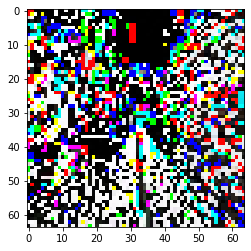

[[[ 44  48  49]
  [252   0   1]
  [  2   1 255]
  ...
  [  6 248 251]
  [ 30  34  37]
  [233 237 240]]

 [[253   1   2]
  [210 214 215]
  [  7   6   4]
  ...
  [231 217 220]
  [234 238 241]
  [ 38  42  45]]

 [[253 255 254]
  [  7   9   8]
  [ 23  28  29]
  ...
  [  9 234 227]
  [ 46  40  35]
  [ 25  19  14]]

 ...

 [[  5   5   3]
  [244 244 242]
  [243 239 243]
  ...
  [252   3  10]
  [  5   0   0]
  [  5   0   0]]

 [[252 252 250]
  [ 29  29  27]
  [  1 255   2]
  ...
  [  6   2 254]
  [ 19  15  12]
  [  5   1 254]]

 [[  8   8   6]
  [  5   5   3]
  [  4   2   5]
  ...
  [ 22  18  14]
  [ 19  15  12]
  [ 19  15  12]]]


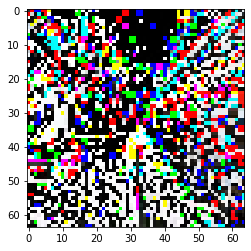

[[[255 255 255]
  [  0   0   0]
  [133 136 157]
  ...
  [  5 228 234]
  [254 240 229]
  [ 72  58  47]]

 [[  0   0   0]
  [  3   3   3]
  [249 252  17]
  ...
  [ 43  10  16]
  [ 72  58  47]
  [246 232 221]]

 [[  5  14  16]
  [249   2   4]
  [ 20  17  14]
  ...
  [253   2   2]
  [233 235 237]
  [254   0   2]]

 ...

 [[250 250 250]
  [  4   4   4]
  [  4   4   4]
  ...
  [247 241 236]
  [254   3   3]
  [255   4   4]]

 [[  0   0   0]
  [249 249 249]
  [ 12  14   9]
  ...
  [246 242 239]
  [255  19  35]
  [241   5  21]]

 [[252 252 252]
  [  8   8   8]
  [ 20  22  17]
  ...
  [ 38  34  31]
  [254  18  34]
  [255  19  35]]]


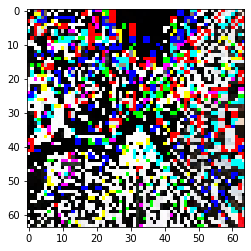

[[[207 215 238]
  [132 140 163]
  [248   0  20]
  ...
  [ 21  20  16]
  [248   2  10]
  [207 217 225]]

 [[  3  11  34]
  [  1   9  32]
  [130 138 158]
  ...
  [  1   0 252]
  [187 197 205]
  [228 238 246]]

 [[255 255 255]
  [240 240 240]
  [212 214 220]
  ...
  [236 236 236]
  [228 239 246]
  [208 219 226]]

 ...

 [[  0   0   2]
  [252 252 254]
  [249 249 251]
  ...
  [ 25  19  15]
  [ 10  17  24]
  [  9  16  23]]

 [[  6   4   7]
  [238 236 239]
  [247 247 247]
  ...
  [ 19  22  23]
  [240 230 222]
  [ 24  14   6]]

 [[242 240 243]
  [247 245 248]
  [249 249 249]
  ...
  [225 228 229]
  [241 231 223]
  [240 230 222]]]


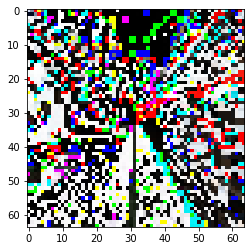

[[[  9  10   7]
  [  0   1 254]
  [ 15   0 221]
  ...
  [ 19  20  22]
  [ 23  18  16]
  [239 234 232]]

 [[ 18  19  16]
  [255   0 253]
  [116 101  66]
  ...
  [ 19  20  22]
  [  3 254 252]
  [ 44  39  37]]

 [[  0 250 247]
  [  5 255 252]
  [ 15   8 252]
  ...
  [  2 255   0]
  [ 51  39  27]
  [ 30  18   6]]

 ...

 [[250 250 250]
  [  4   4   4]
  [ 19  23  17]
  ...
  [240 242 243]
  [255 244 234]
  [255 244 234]]

 [[  5   7   4]
  [ 21  23  20]
  [ 21  21  23]
  ...
  [237 241 244]
  [  9 255 247]
  [254 244 236]]

 [[  3   5   2]
  [251 253 250]
  [252 252 254]
  ...
  [255   3   6]
  [  9 255 247]
  [  9 255 247]]]


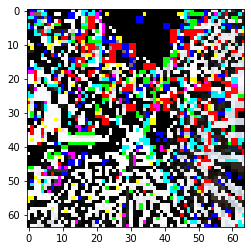

[[[251 249 231]
  [105 103  85]
  [119 109  87]
  ...
  [  6 254 248]
  [236 236 236]
  [ 20  20  20]]

 [[217 215 197]
  [  5   3 241]
  [ 37  27   5]
  ...
  [  6 254 248]
  [ 20  20  20]
  [235 235 235]]

 [[ 10   6   3]
  [ 47  43  40]
  [249   1   8]
  ...
  [ 20  20  18]
  [233 234 239]
  [ 18  19  24]]

 ...

 [[  7   5   6]
  [244 242 243]
  [253 249 255]
  ...
  [  0   3   4]
  [  5   2   3]
  [  5   2   3]]

 [[250 250 252]
  [229 229 231]
  [233 231 234]
  ...
  [  8   1 253]
  [  4   1   2]
  [  5   2   3]]

 [[240 240 242]
  [ 24  24  26]
  [252 250 253]
  ...
  [  7   0 252]
  [  5   2   3]
  [  4   1   2]]]


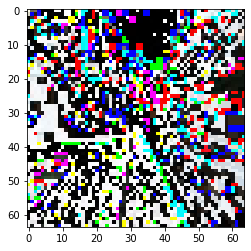

[[[ 18   5   3]
  [ 35  22  20]
  [  7   8   5]
  ...
  [254   0   2]
  [  0   0   0]
  [ 20  20  20]]

 [[ 54  41  39]
  [  9 252 250]
  [ 16  17  14]
  ...
  [234 236 238]
  [ 20  20  20]
  [236 236 236]]

 [[246   2   5]
  [204 216 219]
  [254 248 245]
  ...
  [236 236 236]
  [234 236 240]
  [234 236 240]]

 ...

 [[ 13  15  12]
  [  6   8   5]
  [246 246 244]
  ...
  [ 48  39  35]
  [ 43  38  36]
  [  3 254 252]]

 [[255 255 253]
  [  9   9   7]
  [ 20  22  17]
  ...
  [ 41  39  40]
  [ 50  38  27]
  [ 49  37  26]]

 [[ 15  15  13]
  [  4   4   2]
  [  7   9   4]
  ...
  [  2   0   1]
  [ 49  37  26]
  [ 50  38  27]]]


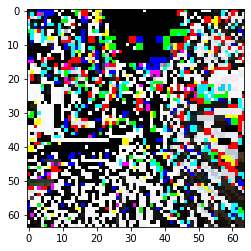

[[[251   1   1]
  [ 14  20  20]
  [252   0   4]
  ...
  [  2   0 254]
  [ 24  20  16]
  [240 236 232]]

 [[210 216 216]
  [245 251 251]
  [211 215 219]
  ...
  [238 236 234]
  [240 236 232]
  [ 45  41  37]]

 [[  2   2 251]
  [  1   1 250]
  [ 10   6   3]
  ...
  [ 20  20  20]
  [ 45  42  33]
  [ 45  42  33]]

 ...

 [[233 233 233]
  [ 16  16  16]
  [255 253   2]
  ...
  [230 254  16]
  [234 237 236]
  [ 17  20  19]]

 [[ 21  21  23]
  [247 247 249]
  [241 241 241]
  ...
  [231   0  16]
  [226   0  24]
  [212 242  10]]

 [[241 241 243]
  [241 241 243]
  [  6   6   6]
  ...
  [ 14  39  55]
  [226   0  24]
  [226   0  24]]]


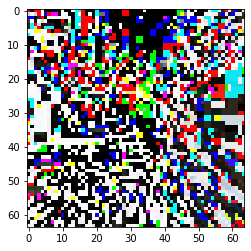

[[[244 251 253]
  [209 216 218]
  [ 12   1 233]
  ...
  [ 19  21  25]
  [254   0   2]
  [254   0   2]]

 [[245 252 254]
  [  2   9  11]
  [ 54  43  19]
  ...
  [ 38  40  44]
  [254   0   2]
  [254   0   2]]

 [[  7 249 247]
  [ 52  38  36]
  [244 254   4]
  ...
  [249   1   8]
  [191 194 201]
  [211 214 221]]

 ...

 [[ 16  16  18]
  [240 240 242]
  [249 251 248]
  ...
  [  3 239 223]
  [  8 254 246]
  [ 31  21  13]]

 [[  0   0 254]
  [  6   6   4]
  [  2   2   4]
  ...
  [  2 239 227]
  [  7 239 219]
  [ 20 252 232]]

 [[  6   6   4]
  [  2   2   0]
  [242 242 244]
  ...
  [221 202 190]
  [  7 239 219]
  [  7 239 219]]]


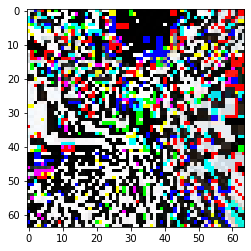

[[[ 15   4   1]
  [ 35  24  21]
  [251   0   2]
  ...
  [  5   0 248]
  [ 27  19  13]
  [ 47  39  33]]

 [[ 53  42  39]
  [  5 250 247]
  [209 214 216]
  ...
  [  5   0 248]
  [ 47  39  33]
  [241 233 227]]

 [[242 246 249]
  [217 221 224]
  [ 20  10   4]
  ...
  [ 54  39  25]
  [ 34  43  48]
  [250   3   8]]

 ...

 [[246 246 244]
  [ 12  12  10]
  [ 15  15  13]
  ...
  [ 31  21  13]
  [ 12  27  37]
  [184 199 209]]

 [[250 250 250]
  [ 15  15  15]
  [255 255 253]
  ...
  [ 23  22  18]
  [ 27  21  17]
  [ 27  21  17]]

 [[  2   2   2]
  [250 250 250]
  [ 36  36  34]
  ...
  [  1   0 252]
  [ 26  20  16]
  [ 27  21  17]]]


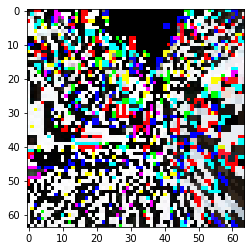

[[[246 255   1]
  [222 231 233]
  [249 249 249]
  ...
  [210 215 221]
  [206 218 227]
  [206 218 227]]

 [[215 224 226]
  [  5  14  16]
  [  0   0   0]
  ...
  [251   0   6]
  [206 218 227]
  [227 239 248]]

 [[ 30  15  11]
  [ 61  46  42]
  [255 252 253]
  ...
  [209 216 223]
  [247 233 222]
  [ 52  38  27]]

 ...

 [[246 246 248]
  [244 244 246]
  [240 244 240]
  ...
  [206 218 227]
  [242 233 227]
  [ 47  38  32]]

 [[243 241 246]
  [231 229 234]
  [249 253 249]
  ...
  [219 216 217]
  [207 217 227]
  [227 237 247]]

 [[244 242 247]
  [  1 255   4]
  [246 250 246]
  ...
  [ 22  19  20]
  [209 219 229]
  [207 217 227]]]


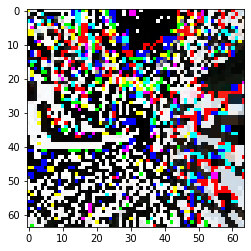

[[[ 21   8   3]
  [ 36  23  18]
  [ 42  13   8]
  ...
  [ 20  20  20]
  [  5 255 250]
  [ 25  19  14]]

 [[ 56  43  38]
  [  6 249 244]
  [ 47  18  13]
  ...
  [236 236 236]
  [ 46  40  35]
  [ 25  19  14]]

 [[ 43  31  33]
  [  4 248 250]
  [  0   0   0]
  ...
  [ 42  40  39]
  [251   0   6]
  [230 235 241]]

 ...

 [[ 16  16  16]
  [  2   2   2]
  [  7   1   8]
  ...
  [ 17  21  24]
  [244  23  50]
  [244  23  50]]

 [[  4   6   3]
  [ 13  15  12]
  [252 246 253]
  ...
  [ 16  19  18]
  [ 16  22  24]
  [ 11  17  19]]

 [[ 17  19  16]
  [247 249 246]
  [252 246 253]
  ...
  [ 16  19  18]
  [ 14  20  22]
  [ 16  22  24]]]


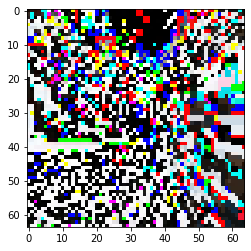

[[[254 254 254]
  [255 255 255]
  [  3   3   3]
  ...
  [233 238 240]
  [251   1   6]
  [231 237 242]]

 [[255 255 255]
  [255 255 255]
  [253 253 253]
  ...
  [253   2   4]
  [210 216 221]
  [231 237 242]]

 [[247 254   0]
  [248 255   1]
  [254 253   0]
  ...
  [194 196 199]
  [  0   0   0]
  [236 236 236]]

 ...

 [[  0   0   0]
  [  4   4   4]
  [252 254 253]
  ...
  [ 25  19  15]
  [243 214 192]
  [243 214 192]]

 [[243 243 243]
  [  0   0   0]
  [ 13  13  13]
  ...
  [ 30  21  15]
  [ 32  18   7]
  [232 218 207]]

 [[252 252 252]
  [ 14  14  14]
  [231 231 231]
  ...
  [ 29  20  14]
  [ 34  20   9]
  [ 32  18   7]]]


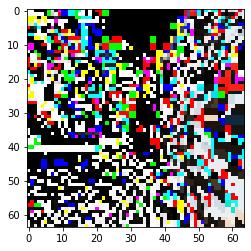

[[[254 254 254]
  [  1   1   1]
  [  5   1 253]
  ...
  [ 17  20  26]
  [  1 255 254]
  [ 42  40  39]]

 [[253 253 253]
  [  3   3   3]
  [  3 255 251]
  ...
  [253   0   6]
  [237 235 234]
  [  1 255 254]]

 [[253 250 251]
  [254 251 252]
  [  0 253 249]
  ...
  [  0   0 254]
  [ 43  41  39]
  [  2   0 254]]

 ...

 [[  4   4   4]
  [253 253 253]
  [255 253   0]
  ...
  [240 235 229]
  [ 50  38  29]
  [ 50  38  29]]

 [[ 15  15  15]
  [249 249 249]
  [247 247 249]
  ...
  [229 233 237]
  [233 236 237]
  [ 39  42  43]]

 [[253 253 253]
  [  0   0   0]
  [  6   6   8]
  ...
  [231 235 239]
  [231 234 235]
  [233 236 237]]]


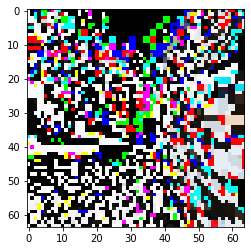

[[[253 251 252]
  [ 17  15  16]
  [  7  21  25]
  ...
  [241 235 228]
  [  2   0 254]
  [217 215 213]]

 [[246 244 245]
  [241 239 240]
  [227 241 245]
  ...
  [  5 255 248]
  [ 22  20  18]
  [ 43  41  39]]

 [[234 248 252]
  [218 232 236]
  [ 13   8  12]
  ...
  [ 23  19  16]
  [  5 255 250]
  [ 46  40  35]]

 ...

 [[255 255 255]
  [253 253 253]
  [  0   2 255]
  ...
  [253   0   4]
  [231 237 241]
  [231 237 241]]

 [[250 248 251]
  [250 248 251]
  [ 17  19  16]
  ...
  [240 237 238]
  [253   0   4]
  [232 235 239]]

 [[252 250 253]
  [233 231 234]
  [254   0 253]
  ...
  [240 237 238]
  [235 238 242]
  [253   0   4]]]


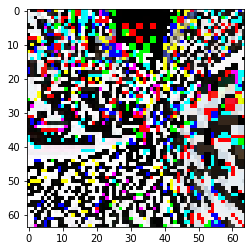

[[[  3 254 253]
  [  3 254 253]
  [  3 253 244]
  ...
  [  0   0   0]
  [230 238 246]
  [250   2  10]]

 [[  0 251 250]
  [ 27  22  21]
  [ 31  25  16]
  ...
  [236 236 236]
  [250   2  10]
  [189 197 205]]

 [[252 252 252]
  [  0   0   0]
  [  6   3   0]
  ...
  [ 17  21  24]
  [191 197 202]
  [190 196 201]]

 ...

 [[254 254 252]
  [  9   9   7]
  [ 22  22  20]
  ...
  [231 238 242]
  [231 237 242]
  [231 237 242]]

 [[  1   3   0]
  [  9  11   8]
  [239 239 239]
  ...
  [229 238 241]
  [233 237 240]
  [233 237 240]]

 [[  3   5   2]
  [ 15  17  14]
  [254 254 254]
  ...
  [229 238 241]
  [253   1   4]
  [233 237 240]]]


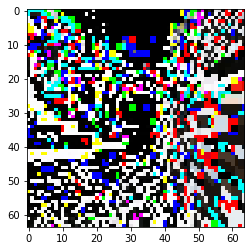

[[[ 14  14  12]
  [243 243 241]
  [216 220 223]
  ...
  [253   1   4]
  [ 70  59  47]
  [ 29  18   6]]

 [[238 238 236]
  [253 253 251]
  [  0   4   7]
  ...
  [ 58  62  65]
  [ 29  18   6]
  [ 49  38  26]]

 [[241 240 243]
  [  5   4   7]
  [ 10   9   5]
  ...
  [  6 255 248]
  [ 36  40  43]
  [ 37  41  44]]

 ...

 [[ 10  10  10]
  [244 244 244]
  [242 242 242]
  ...
  [ 25  18  14]
  [ 25  19  14]
  [ 26  20  15]]

 [[249 249 247]
  [ 14  14  12]
  [  7   7   5]
  ...
  [ 24  20  17]
  [ 23  19  16]
  [ 23  19  16]]

 [[ 21  21  19]
  [  0   0 254]
  [250 250 248]
  ...
  [ 24  20  17]
  [  3 255 252]
  [ 23  19  16]]]


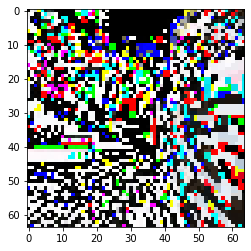

[[[ 14   6   6]
  [ 19  11  11]
  [ 35  46  49]
  ...
  [  5  15  25]
  [210 215 223]
  [211 216 224]]

 [[ 16   8   8]
  [ 20  12  12]
  [248   3   6]
  ...
  [207 217 227]
  [211 216 224]
  [ 16  21  29]]

 [[ 10  11   8]
  [  6   7   4]
  [250 249 254]
  ...
  [231 236 242]
  [ 27  20  13]
  [ 27  20  13]]

 ...

 [[251 251 251]
  [  2   2   2]
  [244 242 247]
  ...
  [ 27  19  13]
  [ 25  19  15]
  [ 24  18  14]]

 [[ 13  11  14]
  [240 238 241]
  [248 248 248]
  ...
  [ 23  17  12]
  [ 27  19  13]
  [ 27  19  13]]

 [[237 235 238]
  [255 253   0]
  [ 25  25  25]
  ...
  [ 23  17  12]
  [ 24  16  10]
  [ 27  19  13]]]


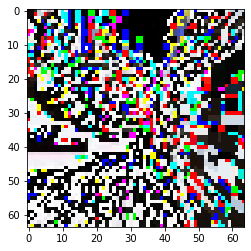

[[[224 241 245]
  [213 230 234]
  [223 223 221]
  ...
  [ 23   3 241]
  [  2   0 252]
  [ 22  20  16]]

 [[244   5   9]
  [237 254   2]
  [  0   0 254]
  ...
  [ 17 253 235]
  [ 43  41  37]
  [  2   0 252]]

 [[  5   2   3]
  [  1 254 255]
  [  7   3 255]
  ...
  [ 22  20  18]
  [192 195 199]
  [253   0   4]]

 ...

 [[241 241 243]
  [  0   0   2]
  [  7   9   4]
  ...
  [232 237 239]
  [231 237 241]
  [231 237 241]]

 [[246 246 248]
  [  6   6   8]
  [ 33  37  33]
  ...
  [ 27  21  17]
  [232 237 239]
  [232 237 239]]

 [[249 249 251]
  [  8   8  10]
  [237 241 237]
  ...
  [ 25  19  15]
  [ 20  25  27]
  [232 237 239]]]


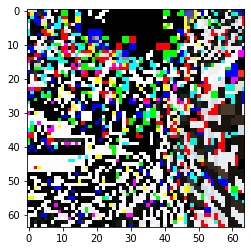

[[[ 26  12  10]
  [ 31  17  15]
  [ 20  13  14]
  ...
  [  1 255   0]
  [ 17  21  26]
  [253   1   6]]

 [[  9 251 249]
  [ 10 252 250]
  [  6 255   0]
  ...
  [ 20  18  19]
  [232 236 241]
  [192 196 201]]

 [[  5 254 253]
  [  9   2   1]
  [253   7   6]
  ...
  [233 240 244]
  [250   2   8]
  [189 197 203]]

 ...

 [[  0   0 254]
  [ 15  15  13]
  [254 252   1]
  ...
  [233 236 240]
  [231 237 242]
  [231 237 242]]

 [[251 253 248]
  [ 24  26  21]
  [225 221 227]
  ...
  [211 217 221]
  [230 237 244]
  [230 237 244]]

 [[ 33  35  30]
  [250 252 247]
  [  1 253   3]
  ...
  [213 219 223]
  [209 216 223]
  [230 237 244]]]


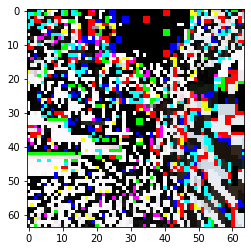

[[[ 10   4   1]
  [ 14   8   5]
  [ 12  12  12]
  ...
  [210 218 222]
  [ 26  20  15]
  [  5 255 250]]

 [[ 11   5   2]
  [ 13   7   4]
  [255 255 255]
  ...
  [ 15  23  27]
  [  4 254 249]
  [ 45  39  34]]

 [[ 11   7   5]
  [  7   3   1]
  [  7 253   0]
  ...
  [ 26  16   8]
  [ 48  38  30]
  [ 48  38  30]]

 ...

 [[251 251 253]
  [241 241 243]
  [ 10  12   9]
  ...
  [ 20  20  20]
  [ 25  19  14]
  [ 25  19  14]]

 [[  9   9   9]
  [249 249 249]
  [255 255 253]
  ...
  [251   1   6]
  [ 23  19  16]
  [ 23  19  16]]

 [[249 249 249]
  [255 255 255]
  [ 12  12  10]
  ...
  [251   1   6]
  [  3 255 252]
  [ 23  19  16]]]


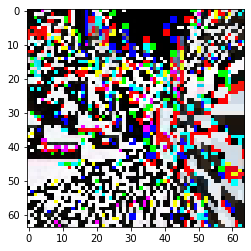

[[[  4   4   6]
  [249 249 251]
  [247 241 240]
  ...
  [254   1   2]
  [215 215 213]
  [ 41  41  39]]

 [[  2   2   4]
  [252 252 254]
  [  6   0 255]
  ...
  [213 216 217]
  [ 42  42  40]
  [236 236 234]]

 [[  1   1   1]
  [  1   1   1]
  [254   5   3]
  ...
  [230 237 244]
  [234 236 238]
  [234 236 238]]

 ...

 [[  7   7   7]
  [252 252 252]
  [250 248 249]
  ...
  [252  20  39]
  [245  22  50]
  [245  22  50]]

 [[  3   3   5]
  [239 239 241]
  [  0   0   0]
  ...
  [ 21  17  12]
  [252  20  39]
  [252  20  39]]

 [[243 243 245]
  [ 12  12  14]
  [  7   7   7]
  ...
  [ 21  17  12]
  [  1  25  44]
  [252  20  39]]]


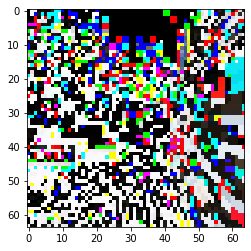

[[[252 252 252]
  [  3   3   3]
  [ 17  21  22]
  ...
  [ 47  38  32]
  [  0   0   0]
  [  0   0   0]]

 [[  1   1   1]
  [  4   4   4]
  [  3   7   8]
  ...
  [  7 254 248]
  [  0   0   0]
  [  0   0   0]]

 [[  0   5   4]
  [255   4   3]
  [233 240 242]
  ...
  [ 42  40  39]
  [253   1   4]
  [253   1   4]]

 ...

 [[254 254 254]
  [  8   8   8]
  [251 251 253]
  ...
  [  4 236 217]
  [ 11 234 206]
  [ 11 234 206]]

 [[254 254 254]
  [253 253 253]
  [254 254 254]
  ...
  [235 239 246]
  [  4 236 217]
  [  4 236 217]]

 [[249 249 249]
  [246 246 246]
  [248 248 248]
  ...
  [235 239 246]
  [255 231 212]
  [  4 236 217]]]


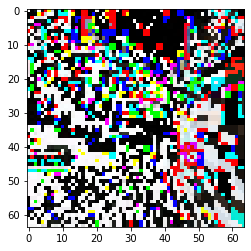

[[[228 246 245]
  [220 238 237]
  [224 231 233]
  ...
  [ 23  17  15]
  [ 18  20  22]
  [233 235 237]]

 [[247   9   8]
  [237 255 254]
  [244 251 253]
  ...
  [ 24  18  16]
  [213 215 217]
  [254   0   2]]

 [[250   1 254]
  [251   2 255]
  [ 23  12  11]
  ...
  [214 216 217]
  [225 239 250]
  [245   3  14]]

 ...

 [[  2   2   0]
  [ 19  19  17]
  [  1   3   0]
  ...
  [213   8   0]
  [207   8 254]
  [206   7 253]]

 [[ 25  25  23]
  [252 252 250]
  [  0   0   0]
  ...
  [210 254 248]
  [213   8   0]
  [211   6 254]]

 [[ 15  15  13]
  [  5   5   3]
  [254 254 254]
  ...
  [210 254 248]
  [205   0 248]
  [196 247 239]]]


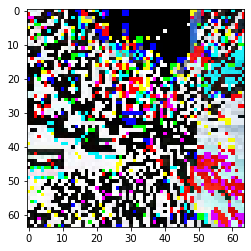

[[[ 26   8   9]
  [ 33  15  16]
  [ 15   4   1]
  ...
  [208 220 227]
  [236 236 236]
  [236 236 236]]

 [[ 11 249 250]
  [ 15 253 254]
  [ 12   1 254]
  ...
  [227 239 246]
  [  0   0   0]
  [ 41  41  41]]

 [[249 255   2]
  [249 255   2]
  [  1   5   4]
  ...
  [  3 255 252]
  [ 78  57  37]
  [ 58  37  17]]

 ...

 [[  7   7   9]
  [228 228 230]
  [  2   0   1]
  ...
  [ 14  18  12]
  [ 16  18  13]
  [ 15  17  12]]

 [[219 219 221]
  [247 247 249]
  [  2   0   3]
  ...
  [ 10  13   8]
  [ 12  18  11]
  [ 12  18  11]]

 [[  2   2   4]
  [255 255   1]
  [249 247 250]
  ...
  [  9  12   7]
  [  9  15   8]
  [ 29  35  28]]]


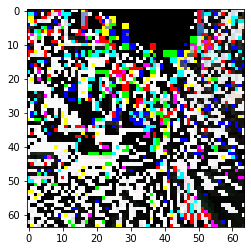

[[[253   7   4]
  [236 246 243]
  [233 241 245]
  ...
  [245  42  22]
  [239  37  28]
  [221  19  10]]

 [[245 255 252]
  [254   8   5]
  [245 253   1]
  ...
  [245  42  22]
  [221  19  10]
  [180 234 225]]

 [[ 13 251 250]
  [ 12 250 249]
  [  3 251   0]
  ...
  [242  43  28]
  [177 234 231]
  [177 234 231]]

 ...

 [[250 248 249]
  [  8   6   7]
  [  1   3   0]
  ...
  [231 227 235]
  [232 226 235]
  [233 227 236]]

 [[  4   4   2]
  [ 24  24  22]
  [  2   4   3]
  ...
  [253 250 253]
  [232 226 235]
  [234 228 237]]

 [[ 13  13  11]
  [255 255 253]
  [  2   4   3]
  ...
  [254 251 254]
  [254 248   1]
  [232 226 235]]]


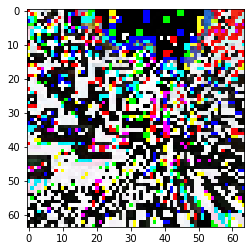

[[[234 242 244]
  [245 253 255]
  [ 10  10   8]
  ...
  [ 29 230 249]
  [  3   6   0]
  [ 11  14   8]]

 [[  1   9  11]
  [243 251 253]
  [  1   1 255]
  ...
  [ 14 215 234]
  [ 12  15   9]
  [ 12  15   9]]

 [[255 255   1]
  [  3   3   5]
  [254 255 252]
  ...
  [ 44 246   2]
  [ 10  13   9]
  [ 10  13   9]]

 ...

 [[249 249 251]
  [254 254   0]
  [ 11  11  13]
  ...
  [ 21  25  17]
  [ 20  26  19]
  [ 15  21  14]]

 [[  5   5   7]
  [248 248 250]
  [ 28  28  26]
  ...
  [  6   9   6]
  [ 15  19  13]
  [ 15  19  13]]

 [[229 229 231]
  [ 25  25  27]
  [  4   4   2]
  ...
  [  6   9   6]
  [  6  10   4]
  [ 15  19  13]]]


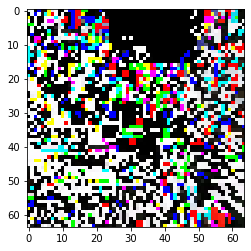

[[[ 25  10  10]
  [ 29  14  14]
  [ 21   1   1]
  ...
  [237   7 254]
  [251 254 253]
  [  5   8   7]]

 [[  8 249 249]
  [ 13 254 254]
  [ 17 253 253]
  ...
  [  2  28  19]
  [  3   6   5]
  [  3   6   5]]

 [[255   2   1]
  [252 255 254]
  [255   6   4]
  ...
  [219   0 248]
  [ 15   3   7]
  [ 15   3   7]]

 ...

 [[254 254 252]
  [ 10  10   8]
  [253 251 252]
  ...
  [  3   5   2]
  [  4   4   2]
  [  8   8   6]]

 [[  8   8   6]
  [  8   8   6]
  [221 221 221]
  ...
  [  2   2   0]
  [ 10  12   7]
  [  9  11   6]]

 [[  5   5   3]
  [242 242 240]
  [ 10  10  10]
  ...
  [  2   2   0]
  [  1   3 254]
  [  9  11   6]]]


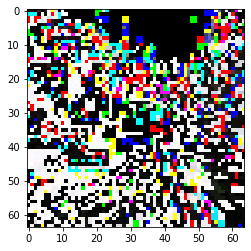

[[[  1   5   4]
  [  4   8   7]
  [249  13  13]
  ...
  [ 24 254   7]
  [ 13 219 245]
  [  6 212 238]]

 [[251 255 254]
  [239 243 242]
  [221 241 241]
  ...
  [  1 231 240]
  [  5 211 237]
  [ 13 219 245]]

 [[253 253 253]
  [  4   4   4]
  [250 249 252]
  ...
  [255 219 233]
  [244 237 247]
  [224 217 227]]

 ...

 [[ 13  15  14]
  [249 251 250]
  [  2   4   3]
  ...
  [244 241 249]
  [244 242 245]
  [246 244 247]]

 [[ 14  14  14]
  [238 238 238]
  [  0   0   2]
  ...
  [241 238 245]
  [244 241 249]
  [244 241 249]]

 [[ 12  12  12]
  [252 252 252]
  [238 238 240]
  ...
  [241 238 245]
  [240 237 245]
  [245 242 250]]]


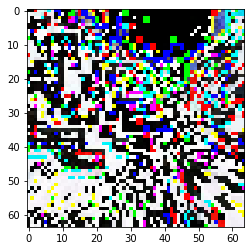

[[[253 249 250]
  [251 247 248]
  [  5 246 246]
  ...
  [218 247  38]
  [  3 253 244]
  [ 28  22  13]]

 [[  2 254 255]
  [ 19  15  16]
  [ 30  15  15]
  ...
  [226 255  46]
  [ 33  27  18]
  [255 249 240]]

 [[  2   2   2]
  [254 254 254]
  [  5   2   0]
  ...
  [ 12  15  14]
  [247 248 245]
  [ 13  14  11]]

 ...

 [[243 237 244]
  [247 241 248]
  [229 226 232]
  ...
  [  2   3   0]
  [  1   3   2]
  [  0   2   1]]

 [[222 219 227]
  [  2 255   7]
  [252 252 250]
  ...
  [  9  12   7]
  [  2   3   0]
  [  2   3   0]]

 [[232 229 237]
  [237 234 242]
  [ 22  22  20]
  ...
  [  9  12   7]
  [ 11  12   9]
  [  2   3   0]]]


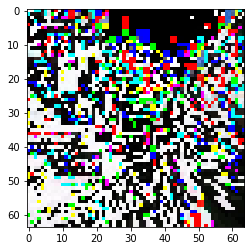

[[[  2   2   2]
  [  2   2   2]
  [  2 255 254]
  ...
  [194 220 227]
  [205 227 231]
  [232 254   2]]

 [[255 255 255]
  [  1   1   1]
  [  7   4   3]
  ...
  [204 230 237]
  [203 225 229]
  [ 10  32  36]]

 [[  0   0   0]
  [253 253 253]
  [246   4   0]
  ...
  [193 241  12]
  [242 251 252]
  [  3  12  13]]

 ...

 [[244 243 248]
  [243 242 247]
  [ 19  19  19]
  ...
  [ 17  19  14]
  [ 16  20  14]
  [ 15  19  13]]

 [[251 248 251]
  [244 241 244]
  [  0 254   3]
  ...
  [ 10  14   6]
  [ 17  20  12]
  [ 17  20  12]]

 [[  0 253   0]
  [  4   1   4]
  [234 232 237]
  ...
  [  9  13   5]
  [ 11  14   6]
  [ 17  20  12]]]


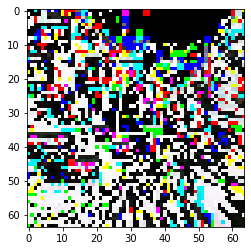

[[[234 249 247]
  [234 249 247]
  [224 247 246]
  ...
  [131 140 180]
  [241  11  11]
  [212 238 238]]

 [[247   6   4]
  [248   7   5]
  [228 251 250]
  ...
  [130 139 179]
  [246  16  16]
  [216 242 242]]

 [[  2 255   0]
  [  9   6   7]
  [ 11 250 255]
  ...
  [  7   9   9]
  [  7  12  11]
  [240 245 244]]

 ...

 [[245 243 245]
  [250 248 250]
  [234 231 234]
  ...
  [237 235 240]
  [239 233 242]
  [241 235 244]]

 [[251 248 251]
  [ 10   7  10]
  [238 234 240]
  ...
  [246 242 250]
  [237 234 242]
  [237 234 242]]

 [[253 250 253]
  [235 232 235]
  [245 241 247]
  ...
  [246 242 250]
  [245 242 250]
  [237 234 242]]]


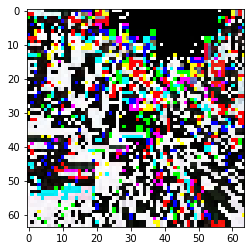

[[[ 29  14  16]
  [ 14 255   1]
  [ 23   3   5]
  ...
  [  0   0   2]
  [126 136 203]
  [110 120 187]]

 [[  8 249 251]
  [  1 242 244]
  [ 19 255   1]
  ...
  [  0   0   2]
  [102 112 179]
  [221 231  42]]

 [[  3   3   1]
  [255 255 253]
  [  1   4   3]
  ...
  [  0   0   0]
  [  6 222 229]
  [ 40   0   7]]

 ...

 [[255 255   1]
  [249 249 251]
  [253 252   1]
  ...
  [243 242 245]
  [ 12  14   9]
  [ 10  12   7]]

 [[  3   3   5]
  [236 236 238]
  [  6   5   8]
  ...
  [  7   7   5]
  [243 243 243]
  [ 13  13  13]]

 [[238 238 240]
  [  6   6   8]
  [252 251 254]
  ...
  [  7   7   5]
  [  7   7   7]
  [243 243 243]]]


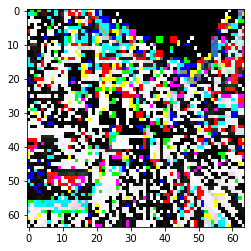

[[[244 250 251]
  [245 251 252]
  [234 249 249]
  ...
  [  0   0 254]
  [250 255  20]
  [250 255  20]]

 [[250   0   1]
  [  4  10  11]
  [245   4   4]
  ...
  [  0   0 254]
  [250 255  20]
  [125 130 151]]

 [[250 253 254]
  [248 251 252]
  [255 252 253]
  ...
  [104 113 180]
  [103 136 182]
  [211 244  34]]

 ...

 [[253 221 235]
  [ 15 239 253]
  [  7 227 241]
  ...
  [252 249 252]
  [226 224 227]
  [  1 255   2]]

 [[233 219 226]
  [248 234 241]
  [242 226 235]
  ...
  [247 250 249]
  [252 248 254]
  [227 223 229]]

 [[  5 247 254]
  [  6 248 255]
  [245 229 238]
  ...
  [  6   9   8]
  [251 247 253]
  [252 248 254]]]


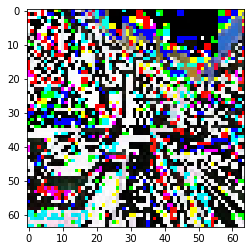

[[[  6 253 253]
  [ 23  14  14]
  [ 32  14  13]
  ...
  [  0   0   0]
  [  0 255   2]
  [  0 255   2]]

 [[ 11   2   2]
  [  2 249 249]
  [ 15 253 252]
  ...
  [  0   0   0]
  [  0 255   2]
  [255 254   1]]

 [[  4   4   4]
  [  4   4   4]
  [253   0 253]
  ...
  [  0   0   0]
  [237   1  46]
  [ 99 119 164]]

 ...

 [[  8   9   6]
  [251 252 249]
  [245 249 250]
  ...
  [ 11 247   0]
  [255 248   3]
  [226 219 230]]

 [[ 12 252   4]
  [ 11 251   3]
  [ 22   4  13]
  ...
  [  2 253   0]
  [  0 253   0]
  [253 250 253]]

 [[245 229 237]
  [240 224 232]
  [  2 240 249]
  ...
  [247 242 245]
  [  1 254   1]
  [  0 253   0]]]


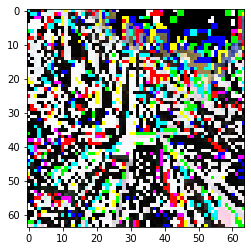

[[[255   1   3]
  [248 250 252]
  [  2   5   6]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[247 249 251]
  [252 254   0]
  [254   1   2]
  ...
  [  0   0   0]
  [  1   1   1]
  [  1   1   1]]

 [[247 246 249]
  [251 250 253]
  [  2   2   4]
  ...
  [255 255 255]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  2   2   2]
  ...
  [249  13   4]
  [  9  12   9]
  [  1   4   1]]

 [[255 255   1]
  [  0   0   2]
  [  0   2   1]
  ...
  [  4 249   0]
  [  6   9   6]
  [  9  12   9]]

 [[255 255   1]
  [  0   0   2]
  [255   1   0]
  ...
  [  2 247 254]
  [253   0 253]
  [  6   9   6]]]


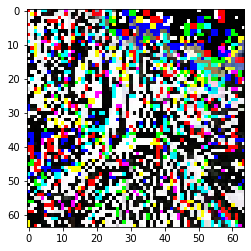

[[[254  31  20]
  [240  17   6]
  [240   4   0]
  ...
  [ 20  17   0]
  [  0   0   0]
  [  1   1   1]]

 [[240  17   6]
  [ 14  47  36]
  [  5  25  21]
  ...
  [ 20  17   0]
  [  0   0   0]
  [  0   0   0]]

 [[230  23   4]
  [222  15 252]
  [240  31  18]
  ...
  [  3   2 254]
  [  1   0 254]
  [  4   3   1]]

 ...

 [[245  14   8]
  [246  15   9]
  [247 247 247]
  ...
  [  3 216 230]
  [237 224 233]
  [254 241 250]]

 [[  2  30  16]
  [242  14   0]
  [236 255 249]
  ...
  [ 40   9  12]
  [  0 216 229]
  [  0 216 229]]

 [[  3  31  17]
  [252  24  10]
  [254  17  11]
  ...
  [ 38   7  10]
  [ 43   3  16]
  [  0 216 229]]]


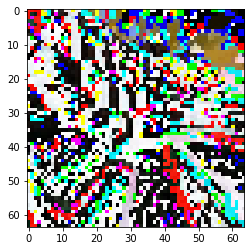

[[[ 15 235 240]
  [ 30 250 255]
  [ 34  16  18]
  ...
  [110  91  26]
  [125 105  20]
  [127 107  22]]

 [[ 32 252   1]
  [253 217 222]
  [ 12 250 252]
  ...
  [104  85  20]
  [128 108  23]
  [127 107  22]]

 [[ 44 249  10]
  [ 41 246   7]
  [  7 216 229]
  ...
  [126 105  27]
  [122 102  24]
  [123 103  25]]

 ...

 [[  5   8   7]
  [253   0 255]
  [  5  33  21]
  ...
  [ 27  26  22]
  [ 70  34  37]
  [ 44   8  11]]

 [[248 248 248]
  [ 14  14  14]
  [  3  14   5]
  ...
  [230 231 233]
  [ 28  24  21]
  [ 30  26  23]]

 [[  1   1   1]
  [  4   4   4]
  [ 11  22  13]
  ...
  [229 230 232]
  [249 245 242]
  [ 14  10   7]]]


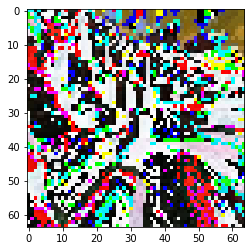

[[[  2 255   0]
  [  7   4   5]
  [238 245 244]
  ...
  [249 249 249]
  [253 251 254]
  [  2   0   3]]

 [[  6   3   4]
  [  6   3   4]
  [216 223 222]
  ...
  [  6   6   6]
  [  1 255   2]
  [253 251 254]]

 [[  2   2   0]
  [  4   4   2]
  [ 14  11  10]
  ...
  [252 252 252]
  [  0   0   0]
  [252 252 252]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [255 255 255]
  ...
  [251 252 254]
  [220 222 221]
  [ 14  16  15]]

 [[  0   0   0]
  [  1   1   1]
  [  0   0   0]
  ...
  [ 12  12  12]
  [218 223 229]
  [234 239 245]]

 [[  0   0   0]
  [  0   0   0]
  [255 255 255]
  ...
  [ 13  13  13]
  [219 224 230]
  [250 255   5]]]


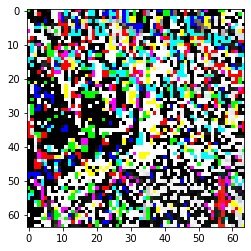

[[[ 16  14  11]
  [  8   6   3]
  [ 17   1   2]
  ...
  [ 49  33  32]
  [ 65  56  52]
  [ 10   1 253]]

 [[ 11   9   6]
  [ 14  12   9]
  [ 46  30  31]
  ...
  [ 15 255 254]
  [  6 253 249]
  [ 42  33  29]]

 [[233 235 239]
  [  9  11  15]
  [ 16  12  11]
  ...
  [ 20   2 253]
  [ 56  33  23]
  [ 52  29  19]]

 ...

 [[245 248 240]
  [ 27  30  22]
  [ 21  26  16]
  ...
  [241  34  11]
  [  4  57  37]
  [226  23   3]]

 [[251   0 248]
  [ 18  23  15]
  [ 14  20  12]
  ...
  [238  29  11]
  [ 18  61  39]
  [254  41  19]]

 [[ 23  28  20]
  [ 15  20  12]
  [  1   7 255]
  ...
  [239  30  12]
  [ 18  61  39]
  [254  41  19]]]


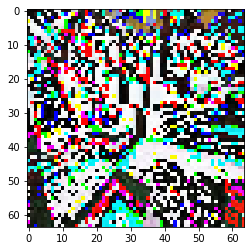

[[[252 249 250]
  [  8   5   6]
  [  5   3   2]
  ...
  [ 15 251 246]
  [  4 238 233]
  [ 44  22  17]]

 [[  7   4   5]
  [254 251 252]
  [  4   2   1]
  ...
  [ 42  22  17]
  [ 48  26  21]
  [ 17 251 246]]

 [[255   0 253]
  [  2   3   0]
  [254   2   3]
  ...
  [ 37  25  25]
  [ 10 252 254]
  [ 12 254   0]]

 ...

 [[ 23  29  25]
  [  3   9   5]
  [  1   4   3]
  ...
  [253 253 255]
  [  1 255   0]
  [246 244 245]]

 [[ 39  39  39]
  [241 241 241]
  [ 20  17  18]
  ...
  [ 14  16  13]
  [ 17  19  14]
  [ 13  15  10]]

 [[241 241 241]
  [248 248 248]
  [  5   2   3]
  ...
  [ 11  13  10]
  [ 11  13   8]
  [ 19  21  16]]]


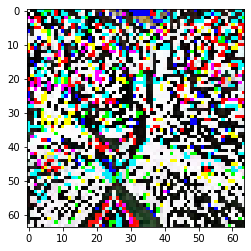

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [251   0 255]
  [251 246 249]
  [  3 254   1]]

 [[  0   0   0]
  [  1   1   1]
  [  2   2   2]
  ...
  [250 255 254]
  [  4 255   2]
  [  6   1   4]]

 [[  0   0   0]
  [  0   0   0]
  [  3 255 254]
  ...
  [252 255 254]
  [245   0   1]
  [251   6   7]]

 ...

 [[ 13   6   6]
  [  4 253 253]
  [251 251 251]
  ...
  [ 22  22  20]
  [233 235 234]
  [ 14  16  15]]

 [[238 241 238]
  [ 12  15  12]
  [243 243 245]
  ...
  [244 244 242]
  [  2   2   4]
  [246 246 248]]

 [[ 15  18  15]
  [ 12  15  12]
  [ 15  15  17]
  ...
  [  7   7   5]
  [242 242 244]
  [250 250 252]]]


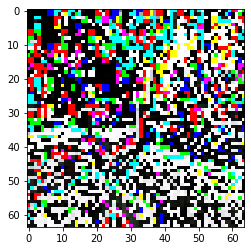

[[[254   1   0]
  [252 255 254]
  [254 254 254]
  ...
  [  3   1   1]
  [253   2   1]
  [253   2   1]]

 [[249 252 251]
  [254   1   0]
  [  0   0   0]
  ...
  [  0 254 254]
  [251   0 255]
  [242 247 246]]

 [[  1   0   3]
  [  0 255   2]
  [  1   1 255]
  ...
  [252   1   1]
  [249   0   0]
  [239 246 246]]

 ...

 [[ 40   0   9]
  [ 17 233 242]
  [ 24 233 246]
  ...
  [225 223 228]
  [250 244 251]
  [241 235 242]]

 [[ 34 247   7]
  [  5 218 234]
  [  0 219 236]
  ...
  [  3   1   6]
  [226 224 227]
  [ 11   9  12]]

 [[  2 215 231]
  [  4 217 233]
  [230 193 210]
  ...
  [242 240 245]
  [  5   3   6]
  [  2   0   3]]]


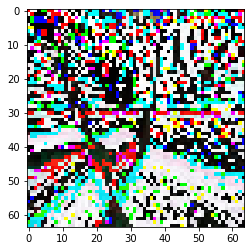

[[[  0   0   0]
  [  0   0   0]
  [  1   1   1]
  ...
  [  5   2   3]
  [253 252 255]
  [254 253   0]]

 [[  1   1   1]
  [  6   6   6]
  [253 253 253]
  ...
  [  5   2   3]
  [253 252 255]
  [  6   5   8]]

 [[ 39  35  32]
  [  4   0 253]
  [  0   0   0]
  ...
  [  8   5   6]
  [246 255   0]
  [233 242 243]]

 ...

 [[223 227 232]
  [225 229 234]
  [224 229 235]
  ...
  [255 254   1]
  [ 23  26  25]
  [250 253 252]]

 [[231 227 224]
  [ 38  34  31]
  [ 40  34  29]
  ...
  [247 246 249]
  [255 254   1]
  [240 239 242]]

 [[ 39  35  32]
  [  7   3   0]
  [ 22  16  11]
  ...
  [241 240 243]
  [247 246 249]
  [245 244 247]]]


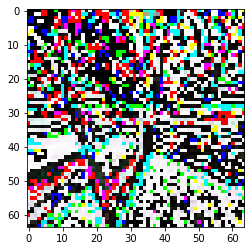

[[[  1 254 255]
  [  2 255   0]
  [  0   0   0]
  ...
  [251 254 253]
  [  6   4   4]
  [  4   2   2]]

 [[  1 254 255]
  [  2 255   0]
  [255 255 255]
  ...
  [253   0 255]
  [  5   3   3]
  [255 253 253]]

 [[  2   0 254]
  [  0 254 252]
  [  3   3   3]
  ...
  [255 248 249]
  [ 14   8   6]
  [ 11   5   3]]

 ...

 [[233   4   0]
  [239  10   6]
  [  2   4   5]
  ...
  [247 243 249]
  [224 220 228]
  [252 248   0]]

 [[252   3  10]
  [205 212 219]
  [216 212 209]
  ...
  [249 246 249]
  [  3 255   5]
  [235 231 237]]

 [[204 211 218]
  [237 244 251]
  [ 42  38  35]
  ...
  [248 245 248]
  [  0 252   2]
  [232 228 234]]]


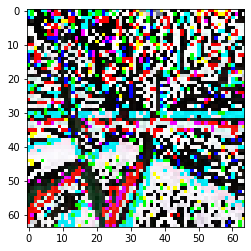

[[[219 234 233]
  [242   1   0]
  [  3   5   6]
  ...
  [251   3   5]
  [254 254 254]
  [254 254 254]]

 [[245   4   3]
  [241   0 255]
  [  0   2   3]
  ...
  [248   0   2]
  [253 253 253]
  [  3   3   3]]

 [[  1 255 254]
  [  1 255 254]
  [247 250 251]
  ...
  [254 254 254]
  [  4 243 245]
  [ 30  13  15]]

 ...

 [[ 35  52  37]
  [ 16  33  18]
  [ 15  56  33]
  ...
  [255 226 242]
  [  9 231 247]
  [243 209 225]]

 [[  1  42  19]
  [ 16  57  34]
  [ 10  57  48]
  ...
  [253 250 255]
  [231 207 219]
  [250 226 238]]

 [[ 13  54  31]
  [ 17  58  35]
  [192 239 230]
  ...
  [  9   6  11]
  [  5 237 249]
  [251 227 239]]]


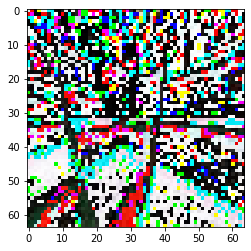

[[[ 40  28  28]
  [  7 251 251]
  [254 254 252]
  ...
  [  0   0 254]
  [219 242 243]
  [219 242 243]]

 [[ 15   3   3]
  [  7 251 251]
  [250 250 248]
  ...
  [251 251 249]
  [220 243 244]
  [240   7   8]]

 [[249 251 250]
  [254   0 255]
  [  1 254 255]
  ...
  [250   4   2]
  [  3   2 255]
  [  2   1 254]]

 ...

 [[216 212 218]
  [ 24  20  26]
  [246 242 248]
  ...
  [250 246 245]
  [  2   0 252]
  [ 10   8   4]]

 [[ 24  20  24]
  [239 235 239]
  [238 238 238]
  ...
  [ 20 242 254]
  [  4 250   0]
  [  1 247 253]]

 [[247 243 247]
  [239 235 239]
  [ 11  11  11]
  ...
  [249 215 227]
  [248 238 244]
  [  7 253   3]]]


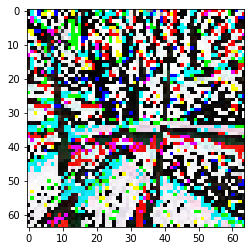

[[[  0   0   4]
  [  0   0   4]
  [255 255 255]
  ...
  [  0   0   0]
  [ 13  15  12]
  [254   0 253]]

 [[  0   0   4]
  [  0   0   4]
  [  5   5   5]
  ...
  [  0   0   0]
  [ 12  14  11]
  [254   0 253]]

 [[  0   0   0]
  [255 255 255]
  [  0   0 254]
  ...
  [  0   0   2]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 20  19  22]
  [228 227 230]
  [251 250 253]
  ...
  [ 22  23  25]
  [ 14  12  11]
  [  1 255 254]]

 [[220 220 222]
  [  2   2   4]
  [  4   3   6]
  ...
  [225 225 225]
  [ 23  23  23]
  [ 13  13  13]]

 [[  0   0   2]
  [  4   4   6]
  [250 249 252]
  ...
  [  1   1   1]
  [235 235 235]
  [246 246 246]]]


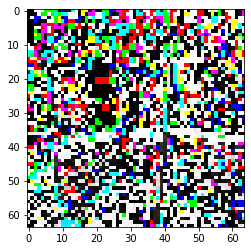

[[[  1   1 255]
  [  2   2   0]
  [251 249 252]
  ...
  [245 254   2]
  [246 246 248]
  [ 13  13  15]]

 [[248 248 246]
  [249 249 247]
  [255 253   0]
  ...
  [237 246 250]
  [238 238 240]
  [252 252 254]]

 [[253   0   1]
  [254   1   2]
  [236   6   2]
  ...
  [233 255   1]
  [  3   2   5]
  [252 251 254]]

 ...

 [[  1   6 253]
  [ 13  18   9]
  [ 18  10   8]
  ...
  [254 247 240]
  [248 246 246]
  [  5   3   3]]

 [[ 28  19  20]
  [ 17   8   9]
  [  8 222 233]
  ...
  [ 14  14  12]
  [ 20  18  14]
  [248 246 242]]

 [[  3 250 251]
  [241 232 233]
  [ 13 227 238]
  ...
  [ 14  14  12]
  [ 17  15  11]
  [ 16  14  10]]]


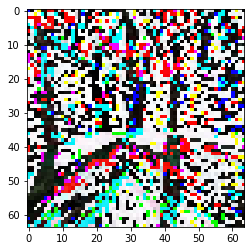

[[[228 254 247]
  [238   8   1]
  [243   4 254]
  ...
  [237 248 249]
  [252 253   0]
  [234 235 238]]

 [[238   8   1]
  [239   9   2]
  [241   2 252]
  ...
  [  0  11  12]
  [ 13  14  17]
  [  4   5   8]]

 [[246   3   1]
  [250   7   5]
  [246   1   2]
  ...
  [236 226 227]
  [215 222 222]
  [253   4   4]]

 ...

 [[251 247 253]
  [246 242 248]
  [240 247 246]
  ...
  [253 254   1]
  [245 246 243]
  [  0   1 254]]

 [[244 244 246]
  [244 244 246]
  [  7  21  19]
  ...
  [  0   0   2]
  [231 229 228]
  [ 41  39  38]]

 [[255 255   1]
  [  0   0   2]
  [246   4   2]
  ...
  [  0   0   2]
  [  1 255 254]
  [ 14  12  11]]]


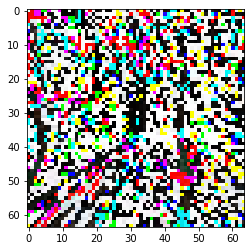

[[[236 230 239]
  [247 241 250]
  [239   6   1]
  ...
  [  3   4   1]
  [  4   9   9]
  [ 13  18  18]]

 [[232 226 235]
  [236 230 239]
  [244  11   6]
  ...
  [  4   5   2]
  [227 232 232]
  [216 221 221]]

 [[ 19   7  13]
  [  9 253   3]
  [ 24  16  11]
  ...
  [ 26  25  23]
  [ 32  27  27]
  [  3 254 254]]

 ...

 [[ 23  29  18]
  [ 30  36  25]
  [  0   5   2]
  ...
  [252   2   6]
  [  8  11  15]
  [253   0   4]]

 [[254   7   2]
  [254   7   2]
  [241  14   2]
  ...
  [  1 255   0]
  [254   0   1]
  [240 242 243]]

 [[254   7   2]
  [ 15  24  19]
  [  3  32  20]
  ...
  [246 244 245]
  [255   1   2]
  [242 244 245]]]


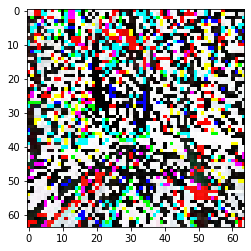

[[[  2 254 251]
  [254 250 247]
  [253   4   3]
  ...
  [ 16   4   6]
  [  4   2   1]
  [  2   0 255]]

 [[ 40  36  33]
  [  2 254 251]
  [237 244 243]
  ...
  [255 243 245]
  [ 26  24  23]
  [ 22  20  19]]

 [[  6 252 242]
  [ 34  24  14]
  [ 32  15  21]
  ...
  [251 243 244]
  [246 246 246]
  [ 10  10  10]]

 ...

 [[235 233 238]
  [253 251   0]
  [ 25  28  20]
  ...
  [ 31  70  43]
  [  9  51  30]
  [  7  49  28]]

 [[  5   9   5]
  [ 24  28  24]
  [  3   3   1]
  ...
  [230   7   2]
  [ 33  69  55]
  [  0  36  22]]

 [[  5   9   5]
  [  1   5   1]
  [  3   3   1]
  ...
  [232   9   4]
  [230  10 252]
  [240  20   6]]]


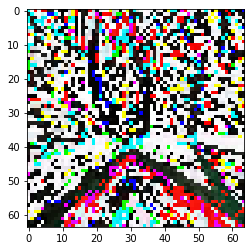

[[[ 13  26  26]
  [233 246 246]
  [  0 234 242]
  ...
  [ 32  12   7]
  [247 252 252]
  [  1   6   6]]

 [[223 236 236]
  [246   3   3]
  [  0 234 242]
  ...
  [ 26   6   1]
  [230 235 235]
  [251   0   0]]

 [[221 241 246]
  [182 202 207]
  [187 200 203]
  ...
  [ 27  13   8]
  [249 254   0]
  [221 226 228]]

 ...

 [[  8   8   8]
  [237 237 237]
  [235 229 238]
  ...
  [  1   4   1]
  [ 12  13  10]
  [  7   8   5]]

 [[254 250 254]
  [235 231 235]
  [255 255 255]
  ...
  [ 58  67  53]
  [253   7 250]
  [  8  18   5]]

 [[254 250 254]
  [  2 254   2]
  [  0   0   0]
  ...
  [ 25  34  20]
  [ 56  66  53]
  [ 38  48  35]]]


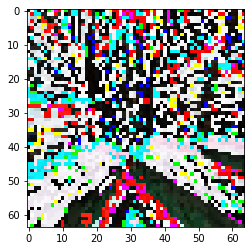

In [14]:
path = os.path.join("C:\\Users\\Robin\\Desktop\\deep_learning")
#video number 1
file = np.load(path+"\\processed_data\\v3_absolute_grape_changeling-12_2293-4124NDTRAIN.npy", allow_pickle=True)[1]
#first five frames of the video
file = np.array(file[-1792:][:100]).astype(np.uint8)
for i in range(99):
    difference = file[i+1]-file[i]
    difference = Image.fromarray(difference, "RGB")
    print(np.array(difference))
    plt.imshow(difference)
    plt.show()